In [1]:
%load_ext autoreload
%autoreload 2


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from matplotlib.ticker import FormatStrFormatter
import matplotlib.gridspec as gridspec


from nest import detectors
#from nest import pls
from nest import overlap 
from nest import nell 
from nest import skymap



* Checks if overlap_try.py and nell_try.py agree on the monopole

In [2]:
# overlap_try.py

f = np.logspace(-5, 0, 1000)

R_auto_t = overlap.Response.overlap('LISA 1', 'LISA 1', f, 0, 't', None)
R_cross_t = overlap.Response.overlap('LISA 1', 'LISA 2', f, 0, 't', None)

# nell_try.py

R0_auto_t = 2/5*nell.AngularResponse.R_ell(0, 'LISA 1', 'LISA 1', f, 't', shift_angle=None)
R0_cross_t = 2/5*nell.AngularResponse.R_ell(0, 'LISA 1', 'LISA 2', f, 't', shift_angle=None)

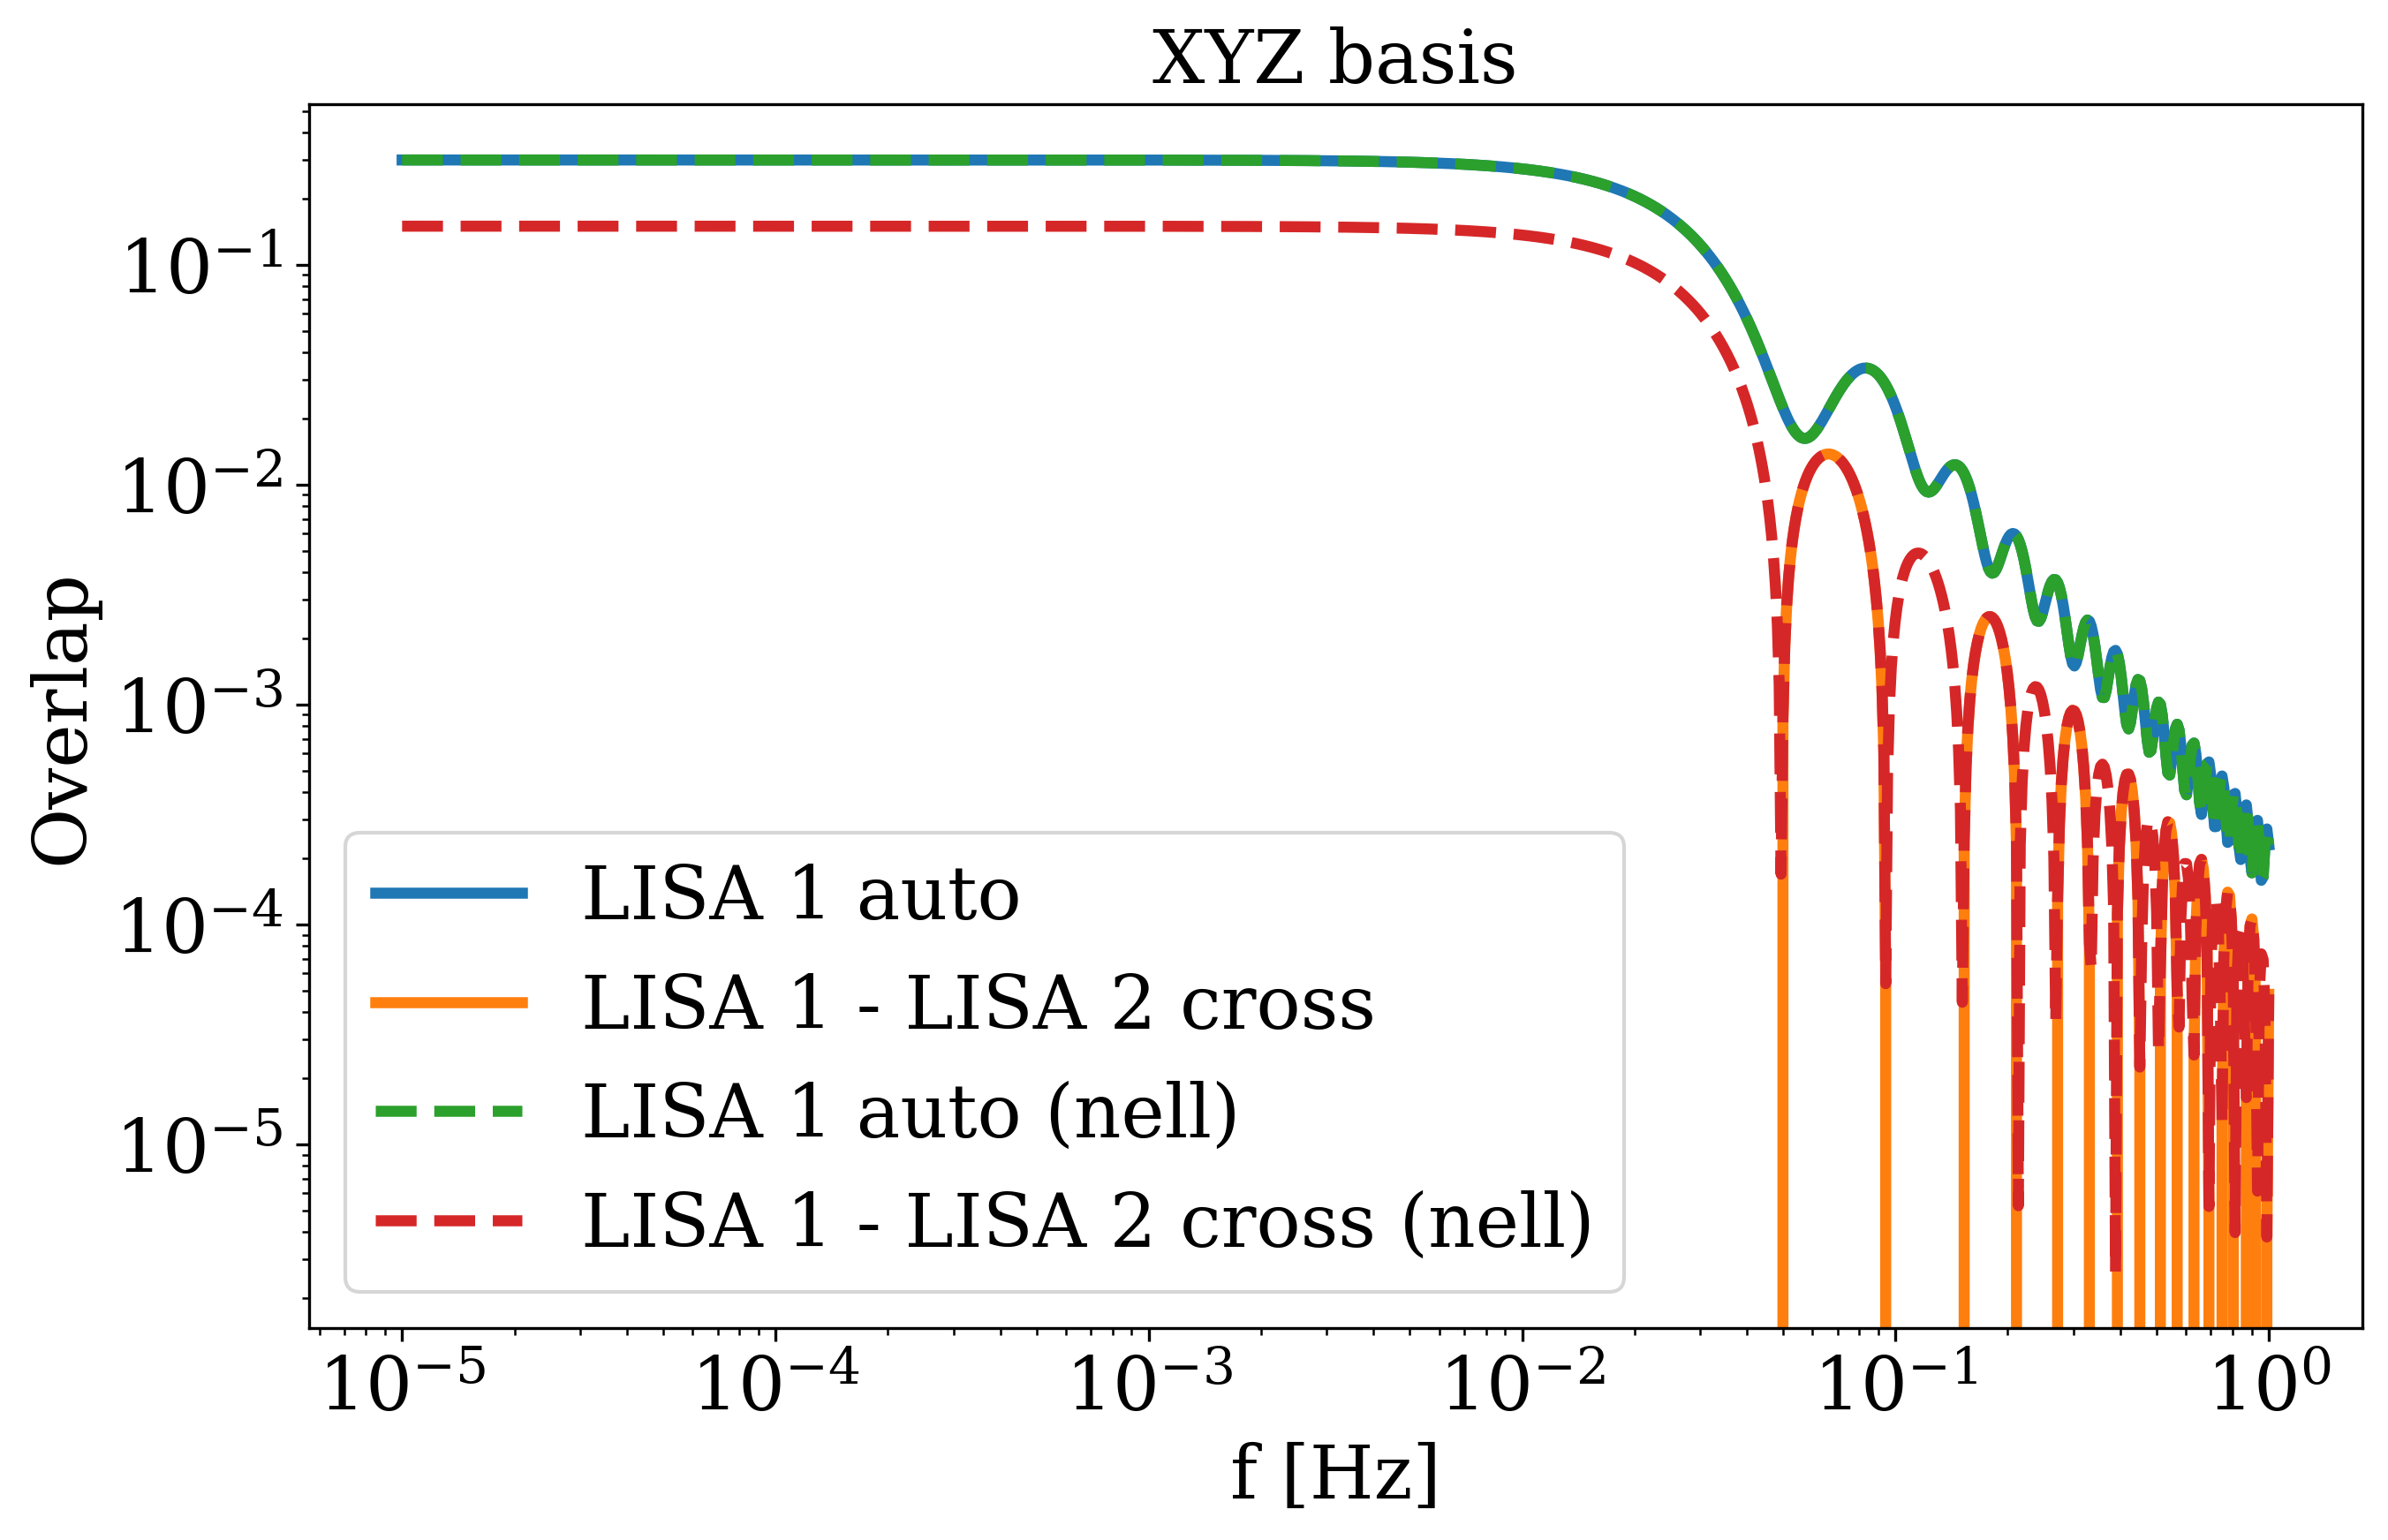

In [3]:
plt.figure(figsize=(10, 6))
plt.loglog(f, R_auto_t, label='LISA 1 auto')
plt.loglog(f, R_cross_t, label='LISA 1 - LISA 2 cross')
plt.loglog(f, R0_auto_t, label='LISA 1 auto (nell)', linestyle='--')    
plt.loglog(f, R0_cross_t, label='LISA 1 - LISA 2 cross (nell)', linestyle='--')
plt.xlabel('f [Hz]')
plt.ylabel('Overlap')
plt.title('XYZ basis')
plt.legend()

In [4]:
R0_AA_t = R_auto_t - R_cross_t
R0_TT_t = R_auto_t + 2*R_cross_t
R0_AA_t_nell = nell.AngularResponse.R_ell_AET(0, 'AA', 't', f)
R0_TT_t_nell = nell.AngularResponse.R_ell_AET(0, 'TT', 't', f)

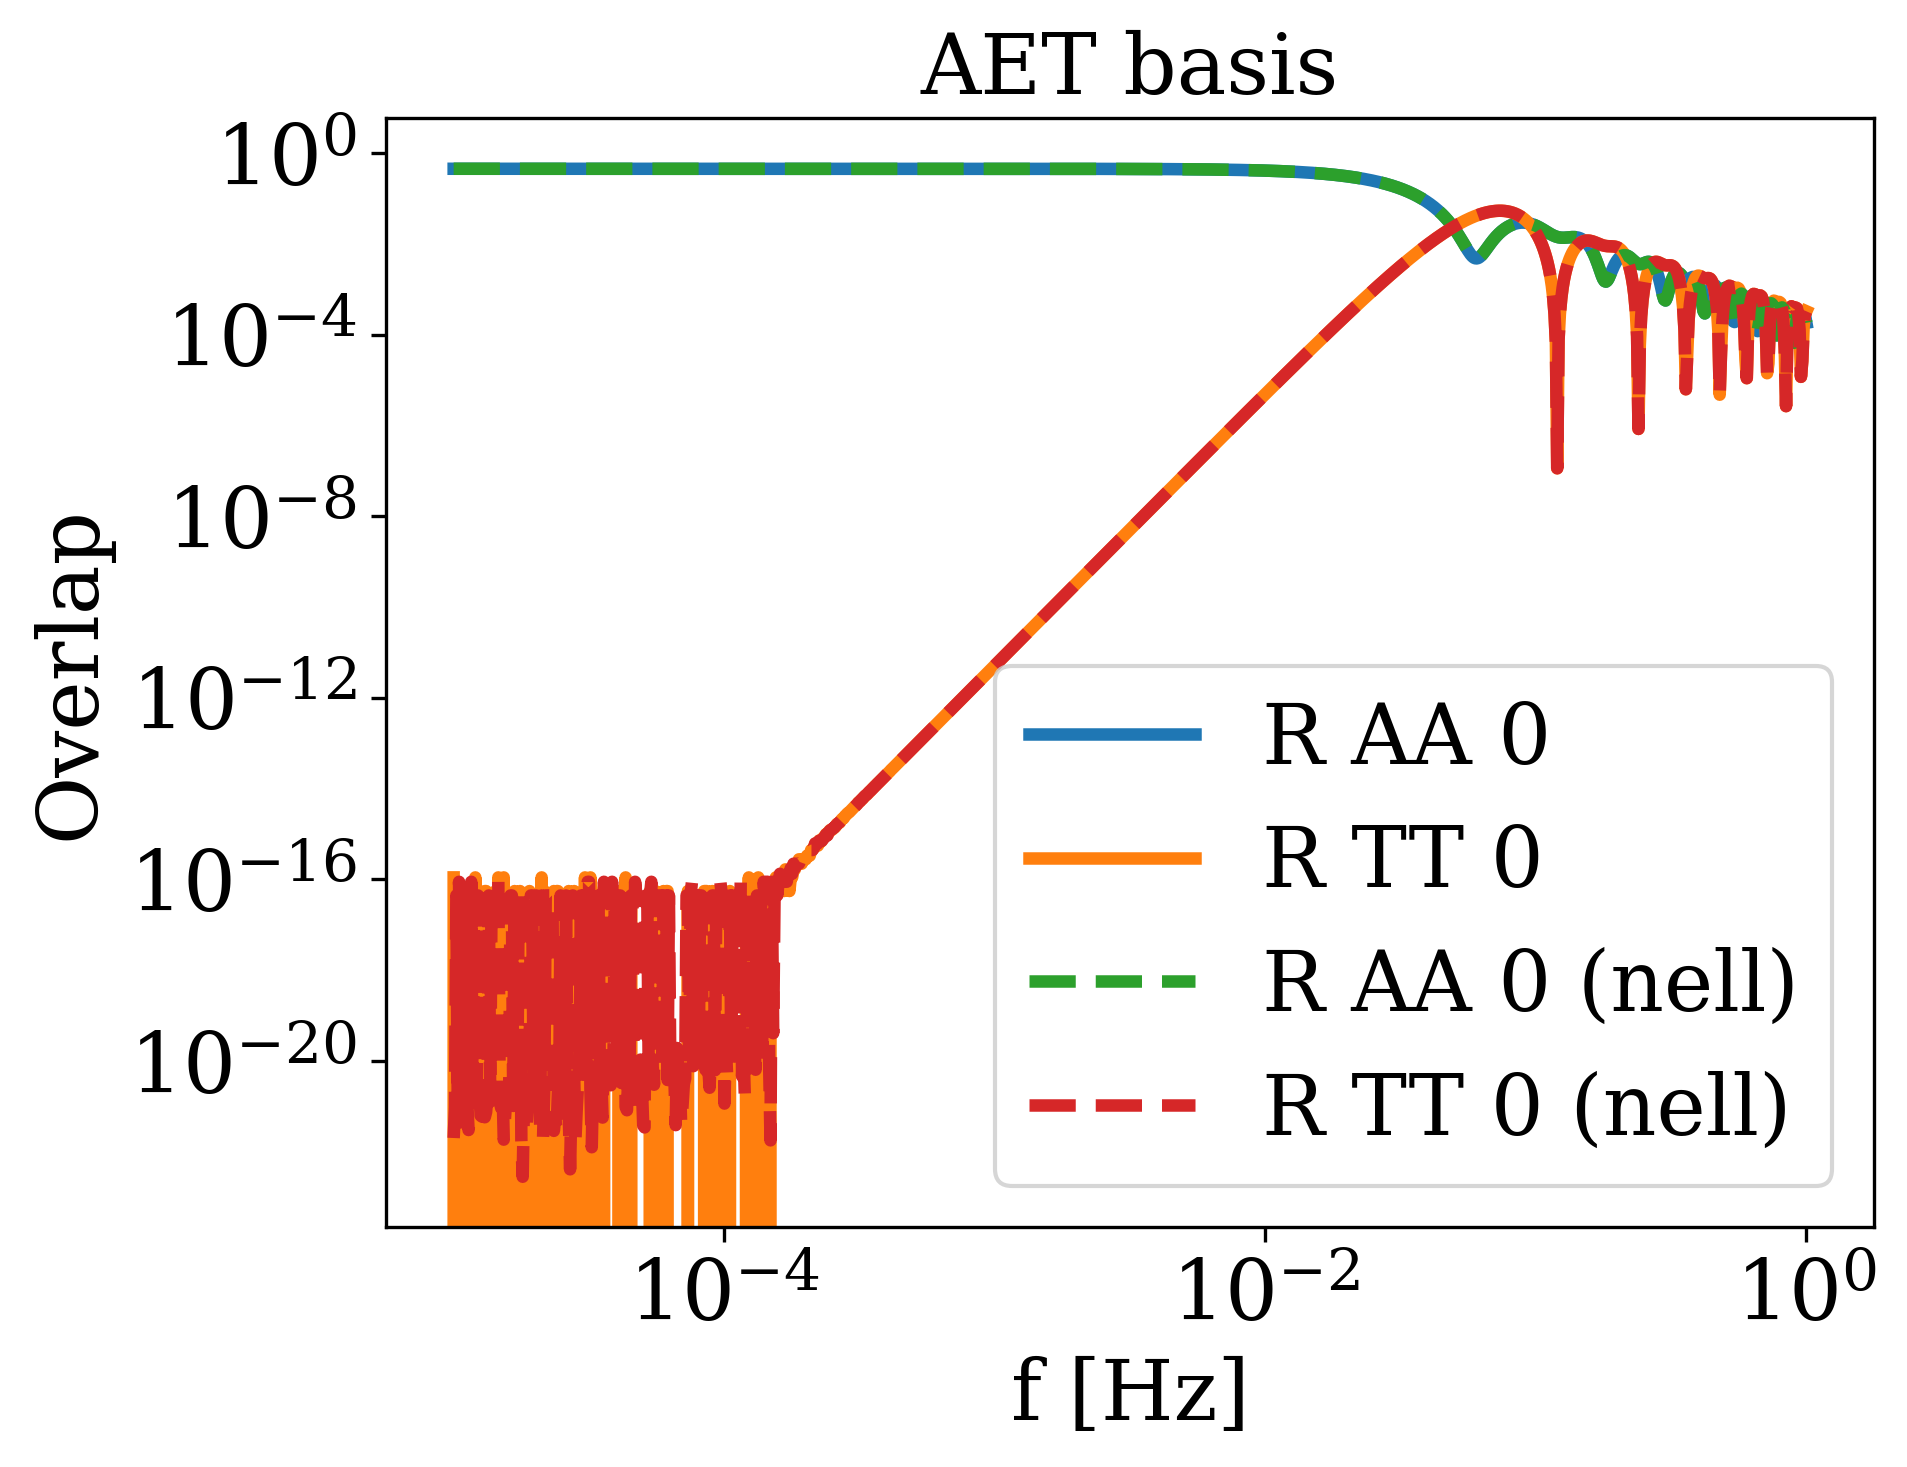

In [5]:
plt.plot(f, R0_AA_t, label='R AA 0 ')
plt.plot(f, R0_TT_t, label='R TT 0 ')
plt.plot(f, R0_AA_t_nell, label='R AA 0 (nell)', linestyle='--')
plt.plot(f, R0_TT_t_nell, label='R TT 0 (nell)', linestyle='--')
plt.xlabel('f [Hz]')
plt.ylabel('Overlap')
plt.xscale('log')
plt.yscale('log')
plt.title('AET basis')
plt.legend()

* checks with nominal values in Bartolo et al 2022 (https://arxiv.org/pdf/2201.08782)

In [6]:
f_star = 0.019 # Hz
x = f/f_star

# R_0 AA

In [55]:
LISA_Rell_0_AA = nell.AngularResponse.R_ell_AET(0, 'AA', 't', f)
LISA_Rell_0_AA_interpolated = 9/20 - 169/1120* x**2 

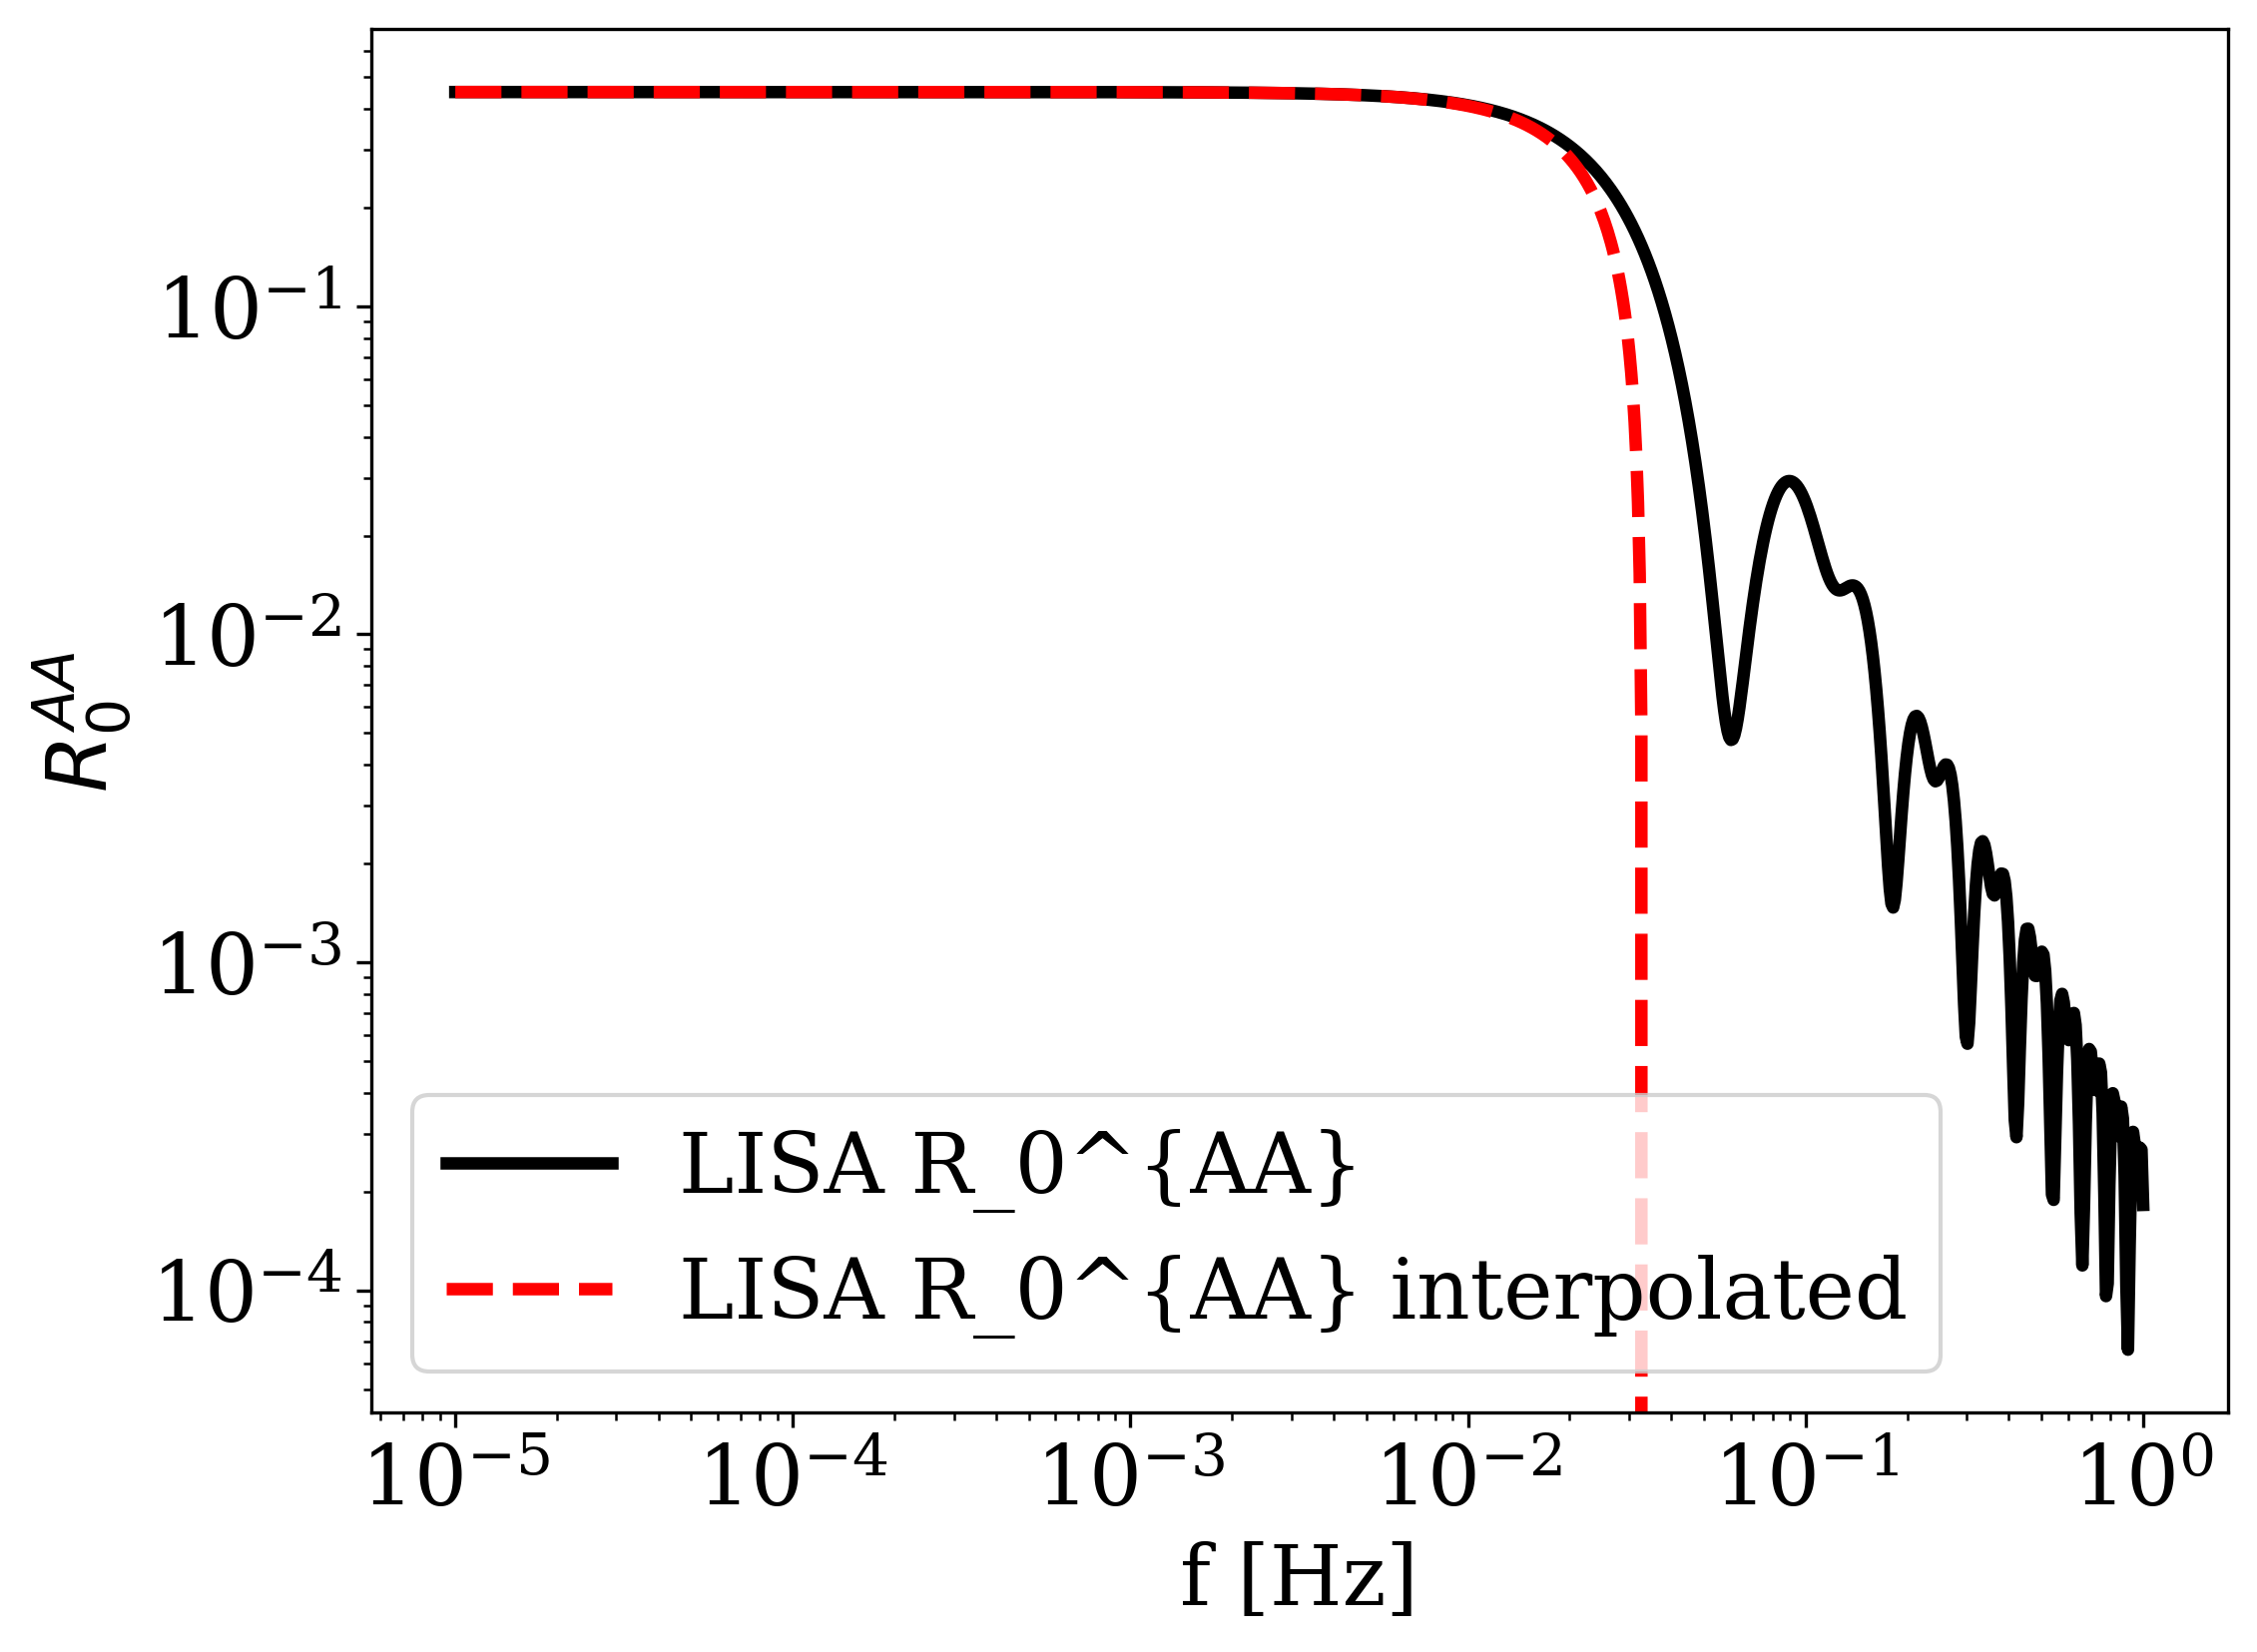

In [56]:
# plot the results

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.loglog(f, LISA_Rell_0_AA, label='LISA R_0^{AA}', color='black')
plt.loglog(f, LISA_Rell_0_AA_interpolated, label='LISA R_0^{AA} interpolated', color='red', linestyle='--')

plt.xlabel('f [Hz]')
plt.ylabel(r'$R_0^{AA}$')
plt.legend()


# R_2 AA

In [9]:
LISA_Rell_2_AA = nell.AngularResponse.R_ell_AET(2, 'AA', 't', f)
LISA_Rell_2_AA_interpolated = 9/14/np.sqrt(5) - 13/56/np.sqrt(5)*x**2

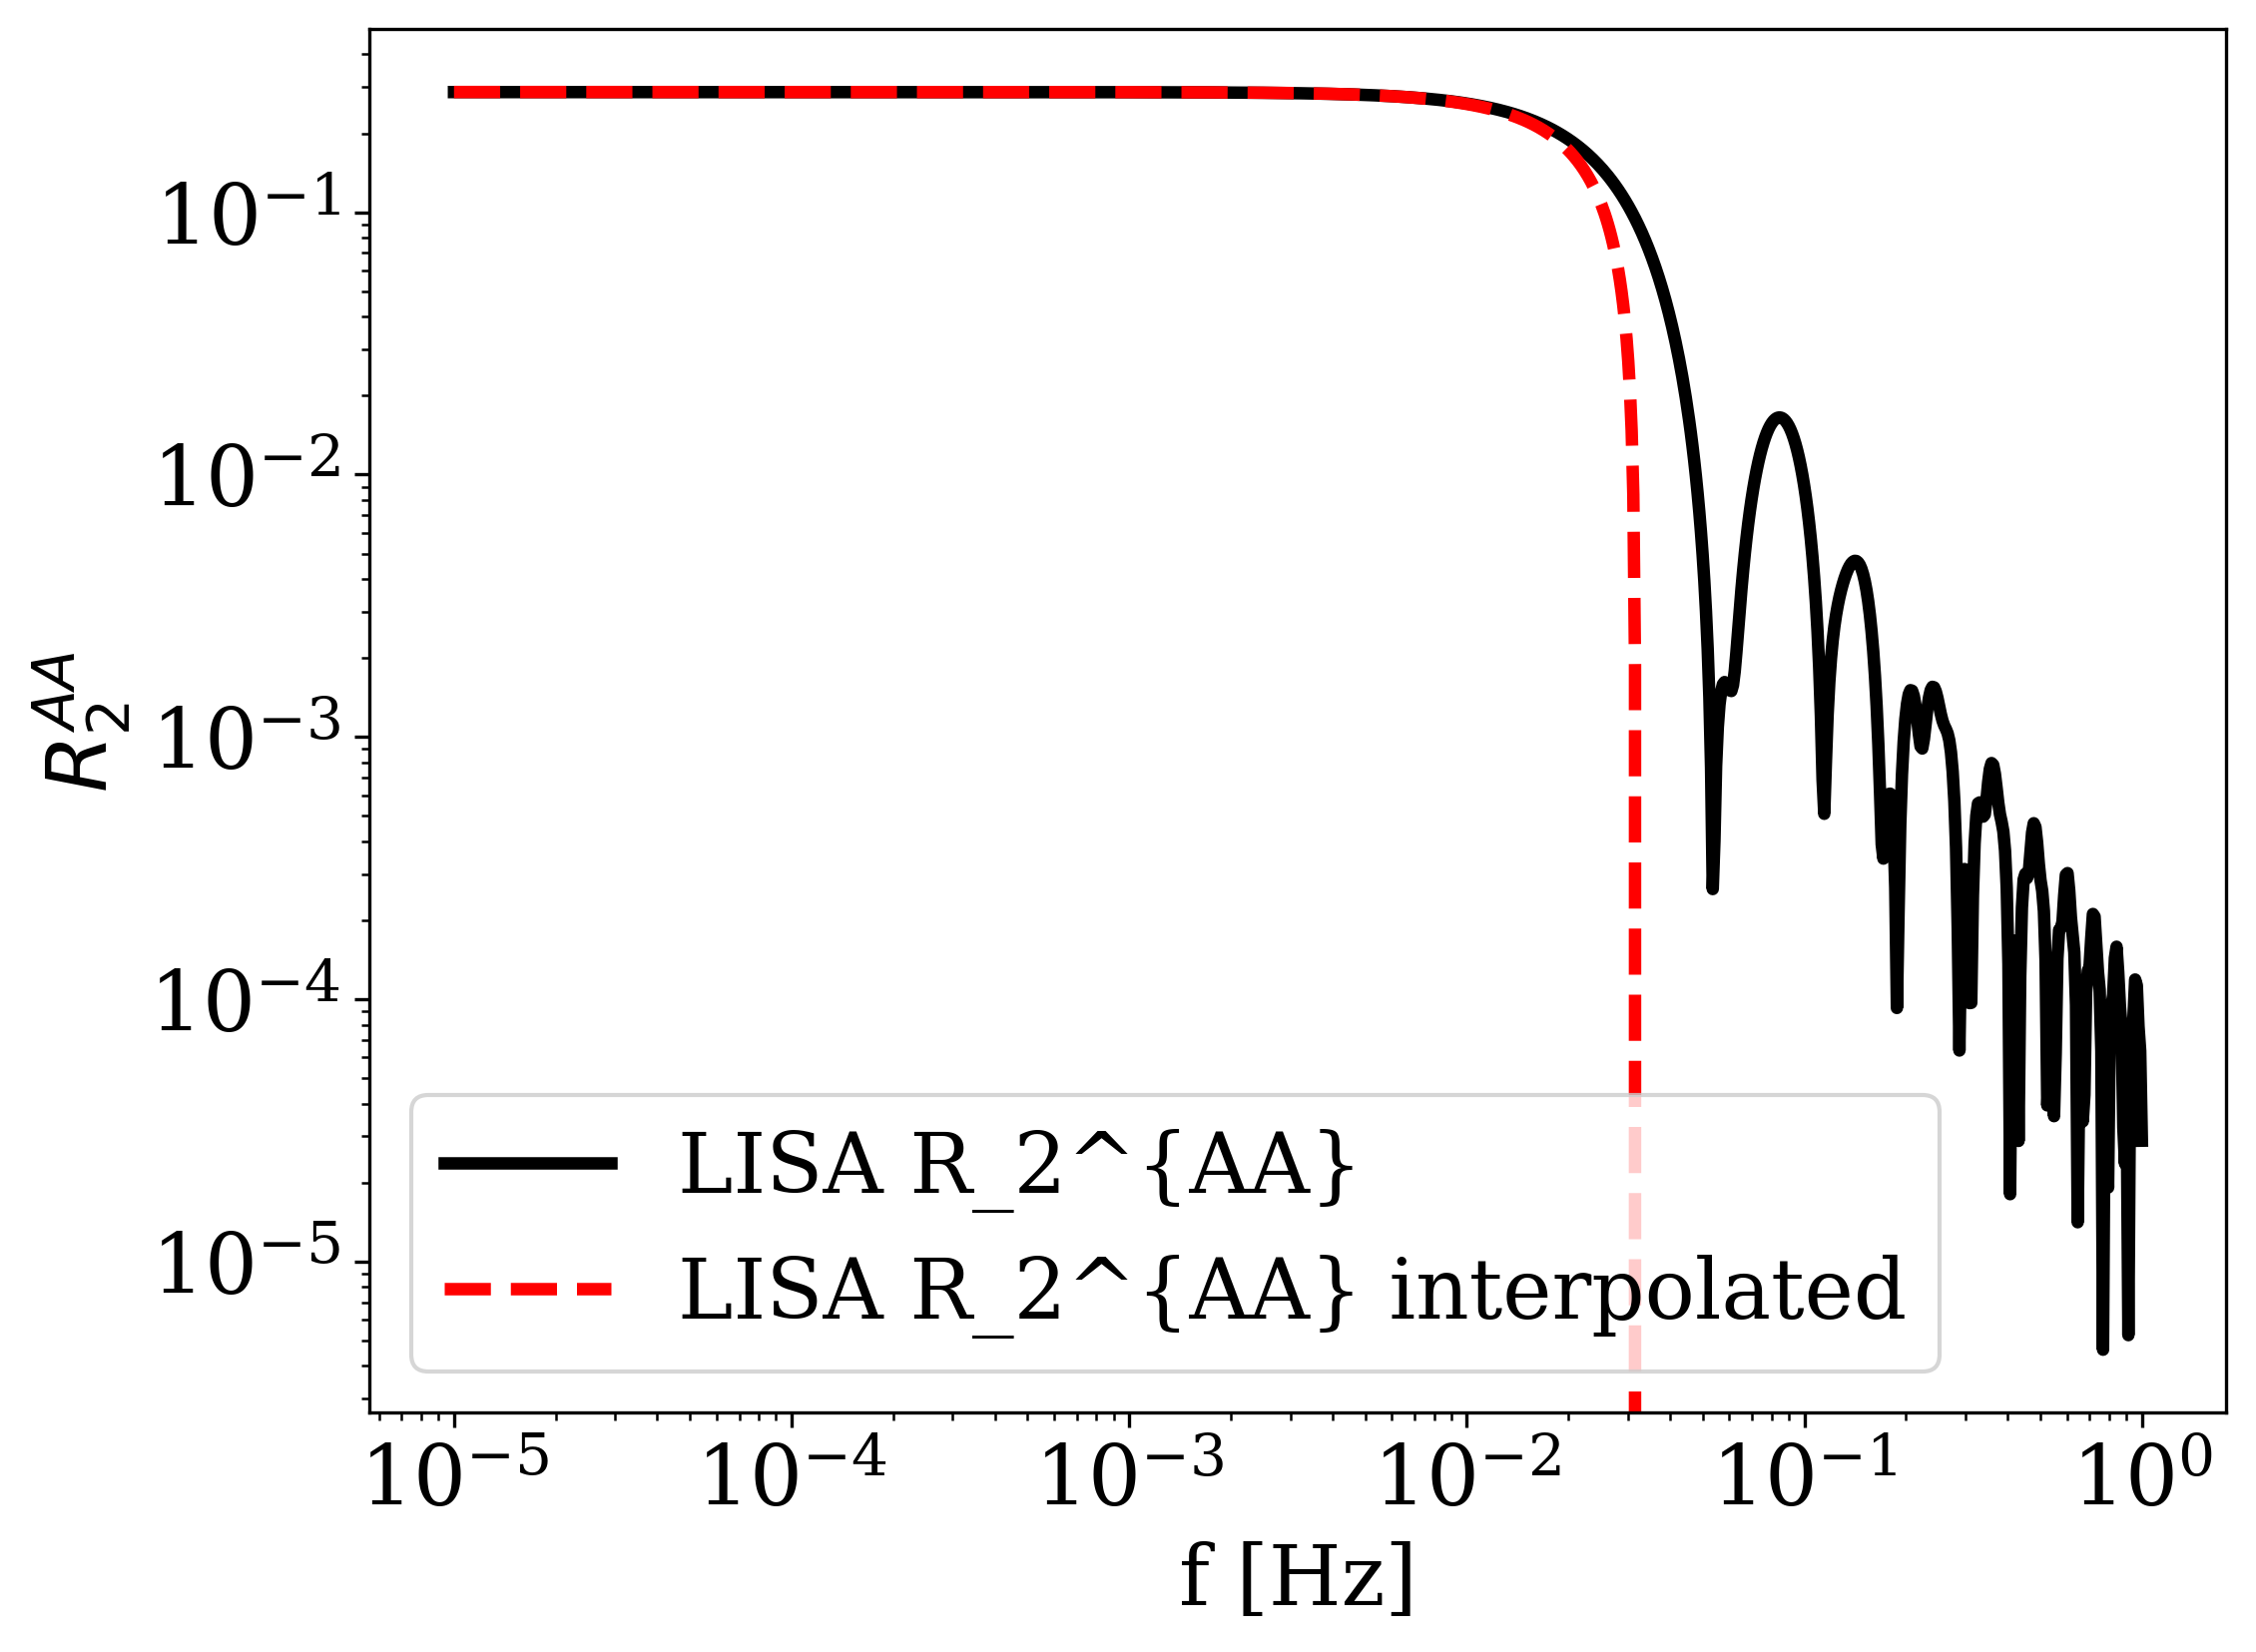

In [10]:
# plot

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.loglog(f, LISA_Rell_2_AA, label='LISA R_2^{AA}', color='black')
plt.loglog(f, LISA_Rell_2_AA_interpolated, label='LISA R_2^{AA} interpolated', color='red', linestyle='--')
plt.xlabel('f [Hz]')
plt.ylabel(r'$R_2^{AA}$')
plt.legend()


# R_2 AT

In [11]:
LISA_Rell_2_AT = nell.AngularResponse.R_ell_AET(2, 'AT', 't', f)
LISA_Rell_2_AT_interpolated = x**4 /(192* np.sqrt(30))

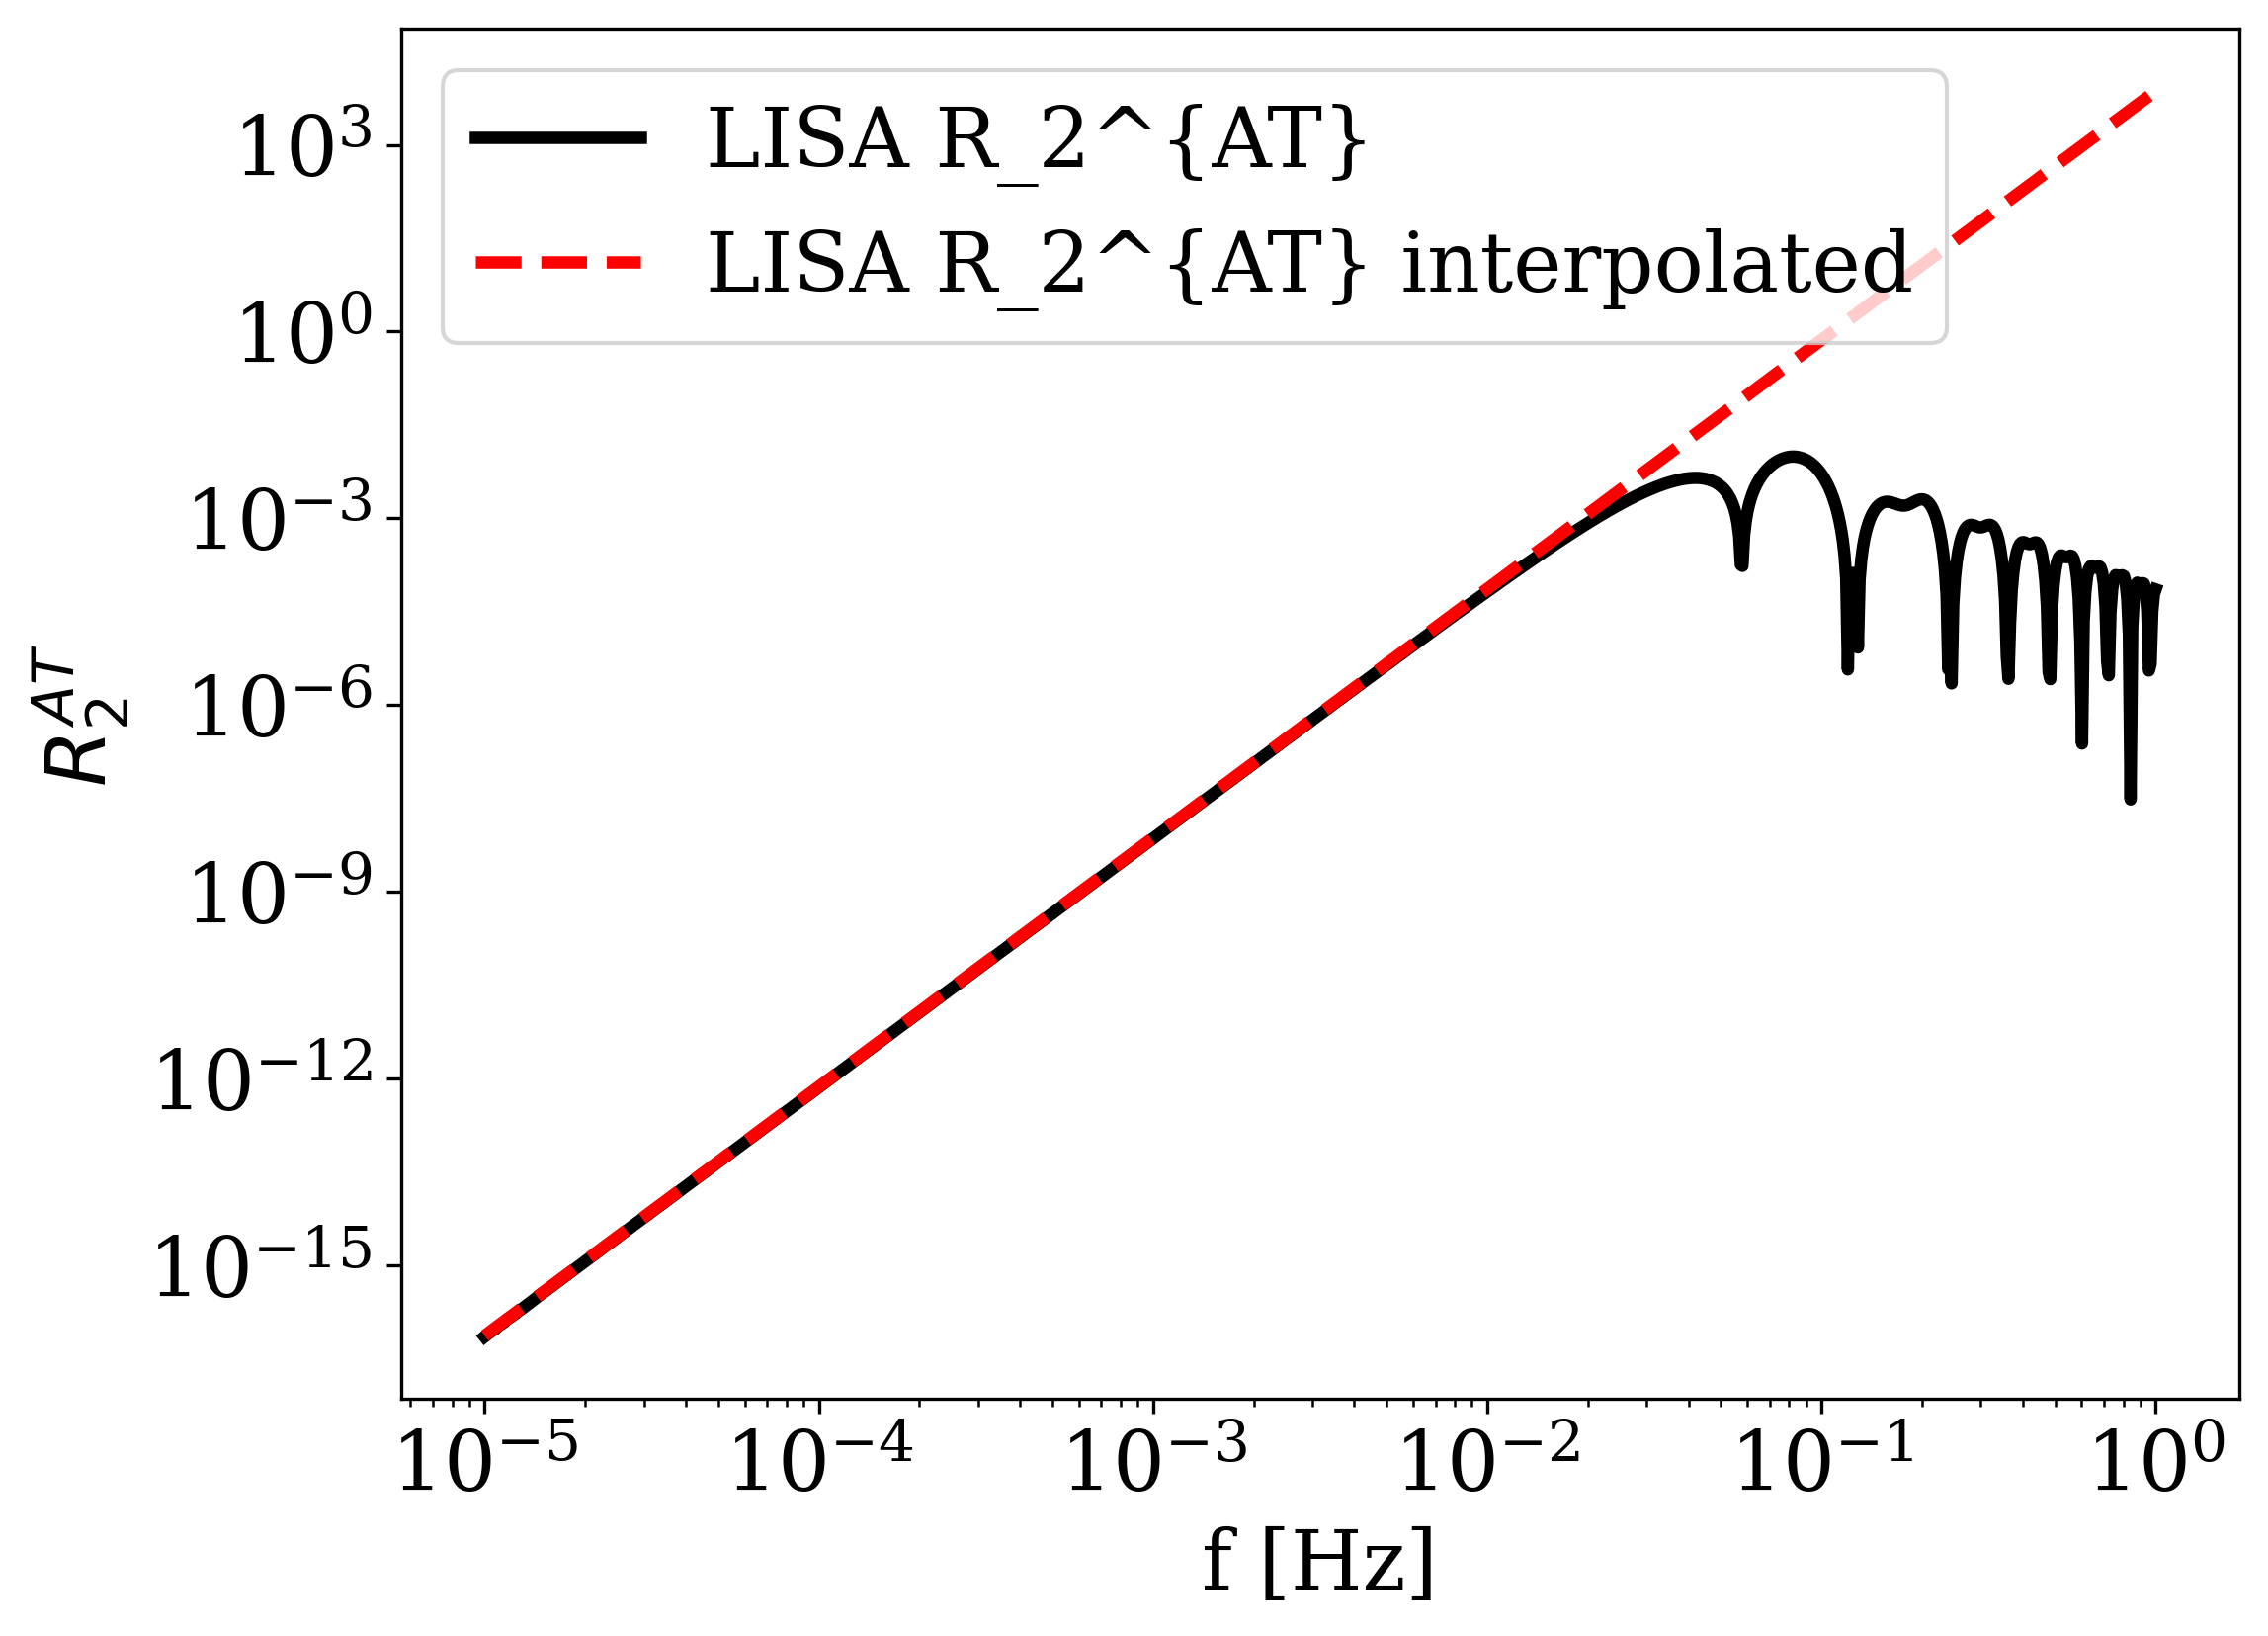

In [12]:
# plot

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.loglog(f, LISA_Rell_2_AT, label='LISA R_2^{AT}', color='black')
plt.loglog(f, LISA_Rell_2_AT_interpolated, label='LISA R_2^{AT} interpolated', color='red', linestyle='--')
plt.xlabel('f [Hz]')
plt.ylabel(r'$R_2^{AT}$')
plt.legend()


# R_2 AE

In [13]:
LISA_Rell_2_AE = nell.AngularResponse.R_ell_AET(2, 'AE', 't', f)
LISA_Rell_2_AE_interpolated = np.sqrt(5/3)*( x**2 )/112

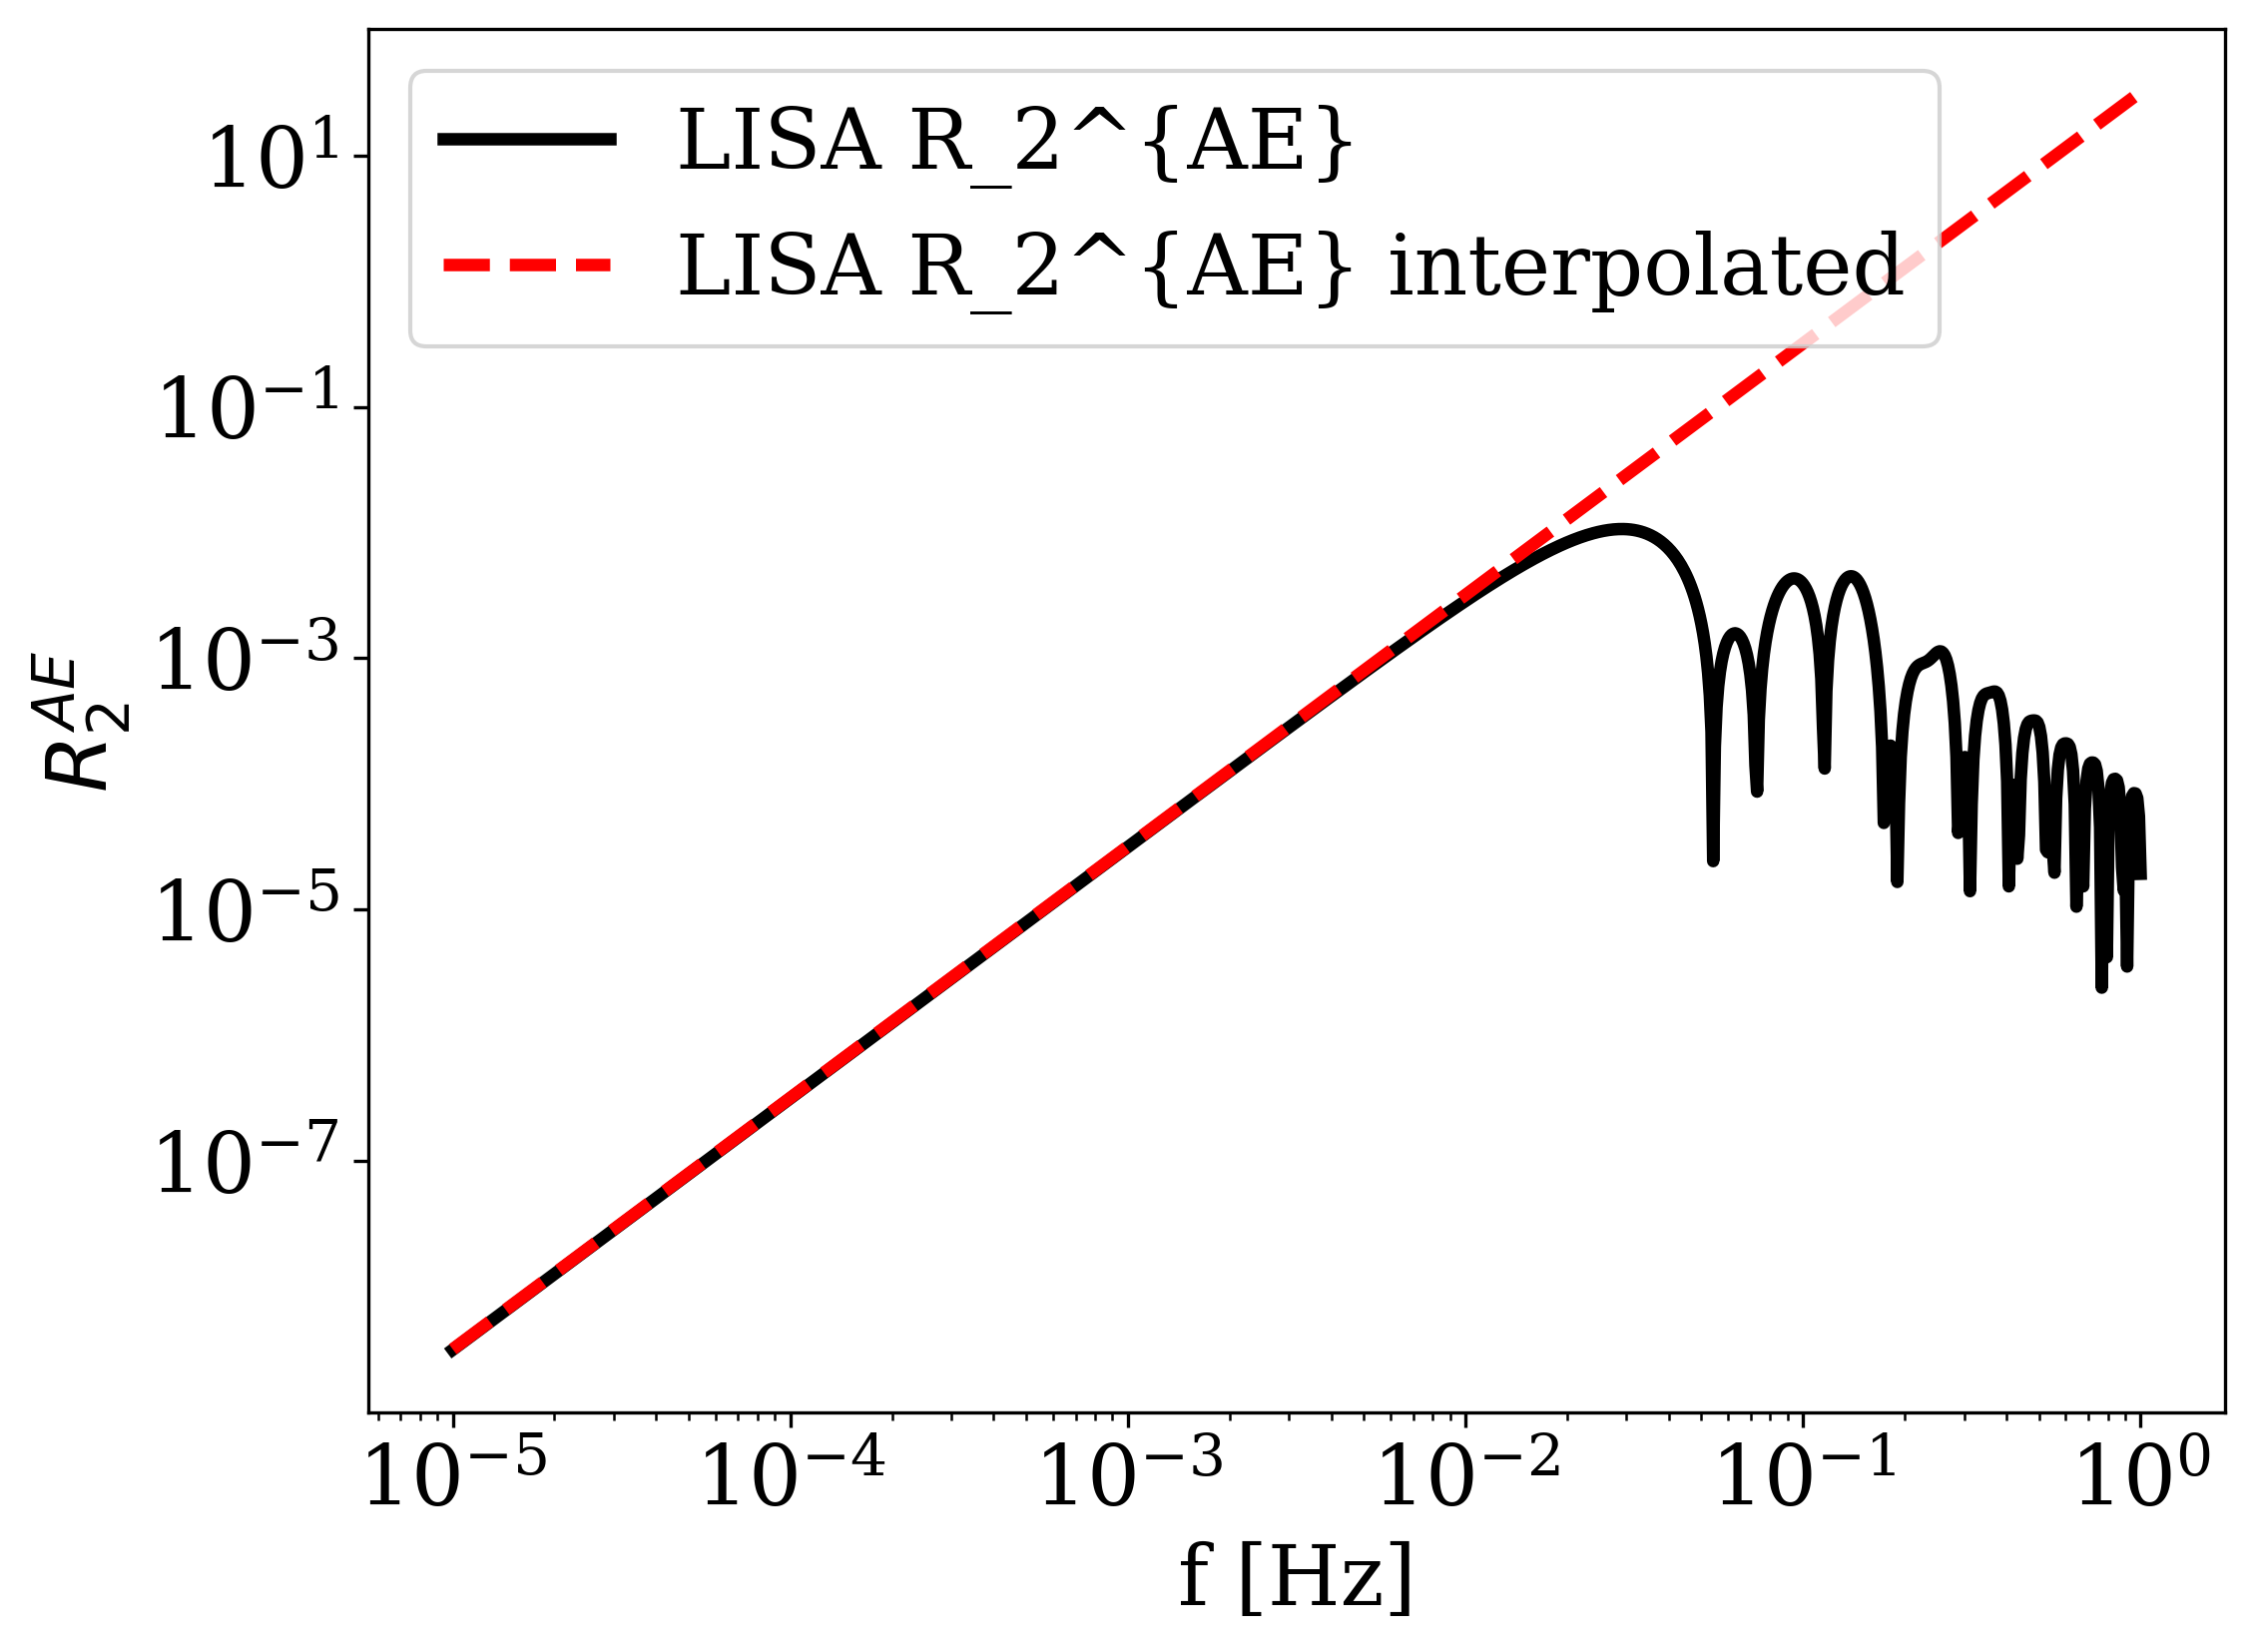

In [14]:
# plot

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.loglog(f, LISA_Rell_2_AE, label='LISA R_2^{AE}', color='black')
plt.loglog(f, LISA_Rell_2_AE_interpolated, label='LISA R_2^{AE} interpolated', color='red', linestyle='--')
plt.xlabel('f [Hz]')
plt.ylabel(r'$R_2^{AE}$')
plt.legend()


# R_0 TT

In [15]:
LISA_Rell_0_TT = nell.AngularResponse.R_ell_AET(0, 'TT', 't', f)
LISA_Rell_0_TT_interpolated = x**6/4032

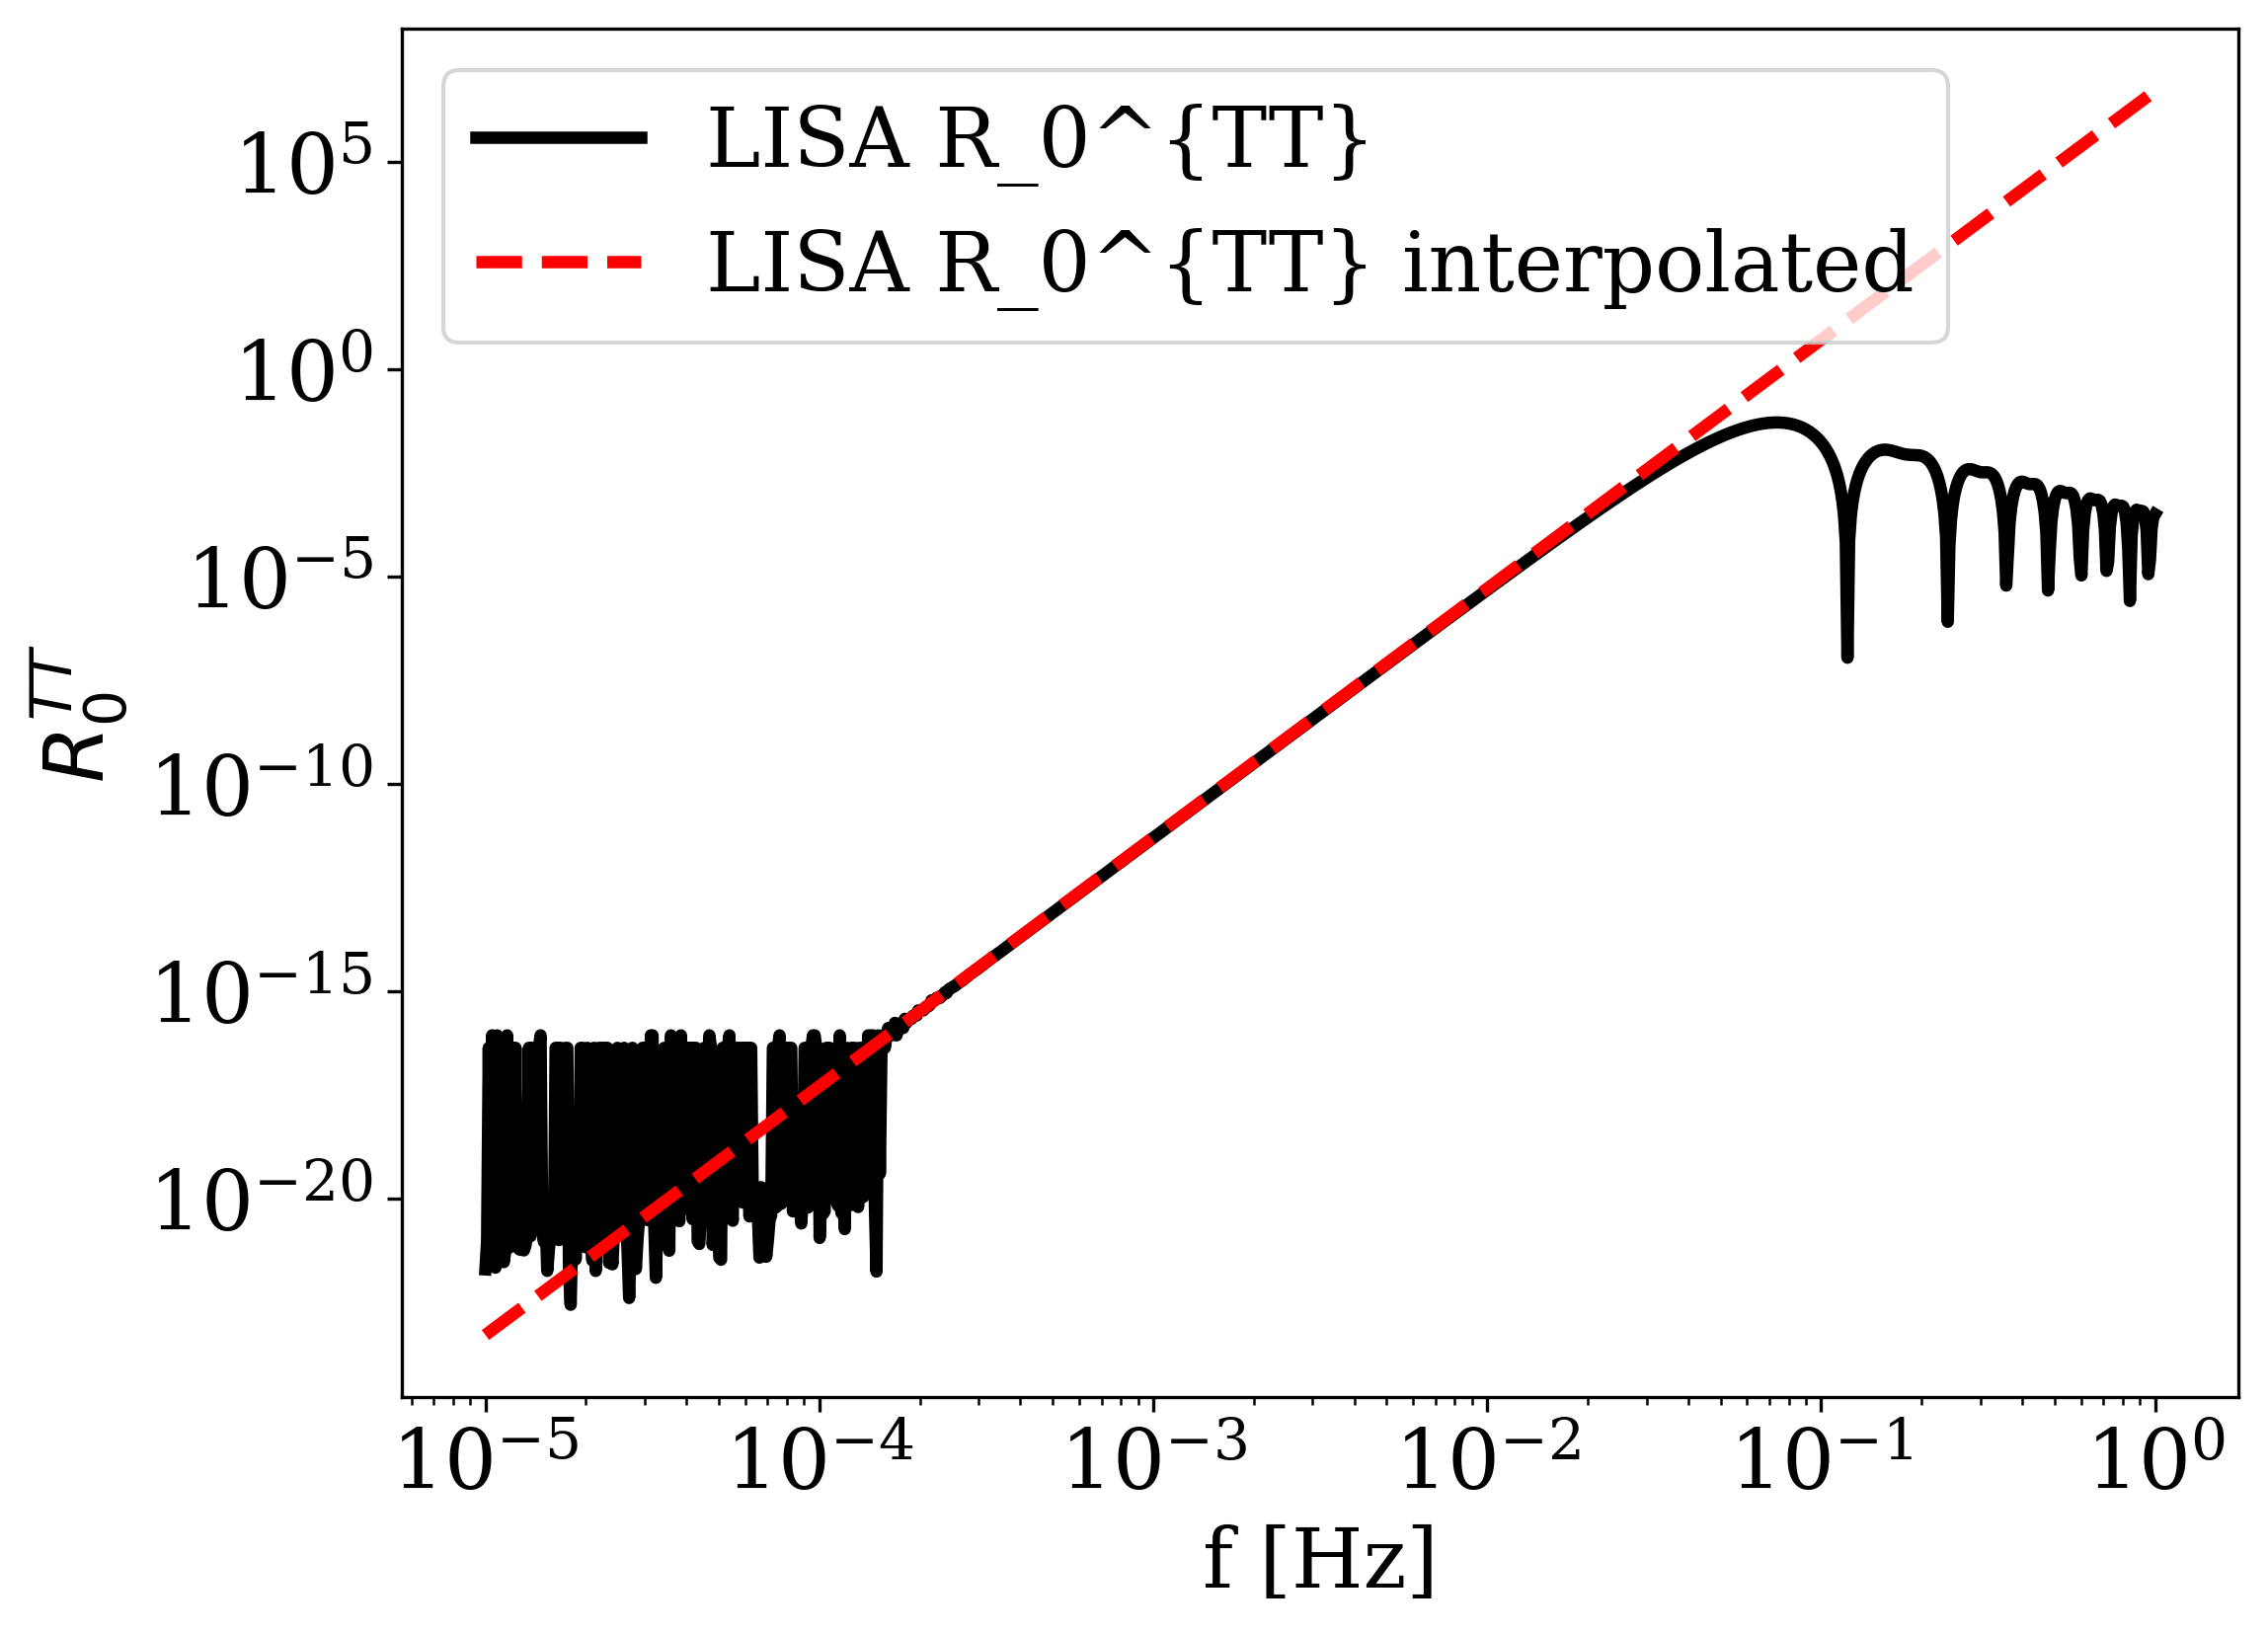

In [16]:
# plot

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.loglog(f, LISA_Rell_0_TT, label='LISA R_0^{TT}', color='black')
plt.loglog(f, LISA_Rell_0_TT_interpolated, label='LISA R_0^{TT} interpolated', color='red', linestyle='--')
plt.xlabel('f [Hz]')
plt.ylabel(r'$R_0^{TT}$')
# plt.xlim([3e-3, 1])
# plt.ylim([1e-7, 2e-1])
plt.legend()


# R_2 TT

In [17]:
LISA_Rell_2_TT = nell.AngularResponse.R_ell_AET(2, 'TT', 't', f)
LISA_Rell_2_TT_interpolated = 73* x**8 /(7983360* np.sqrt(5))

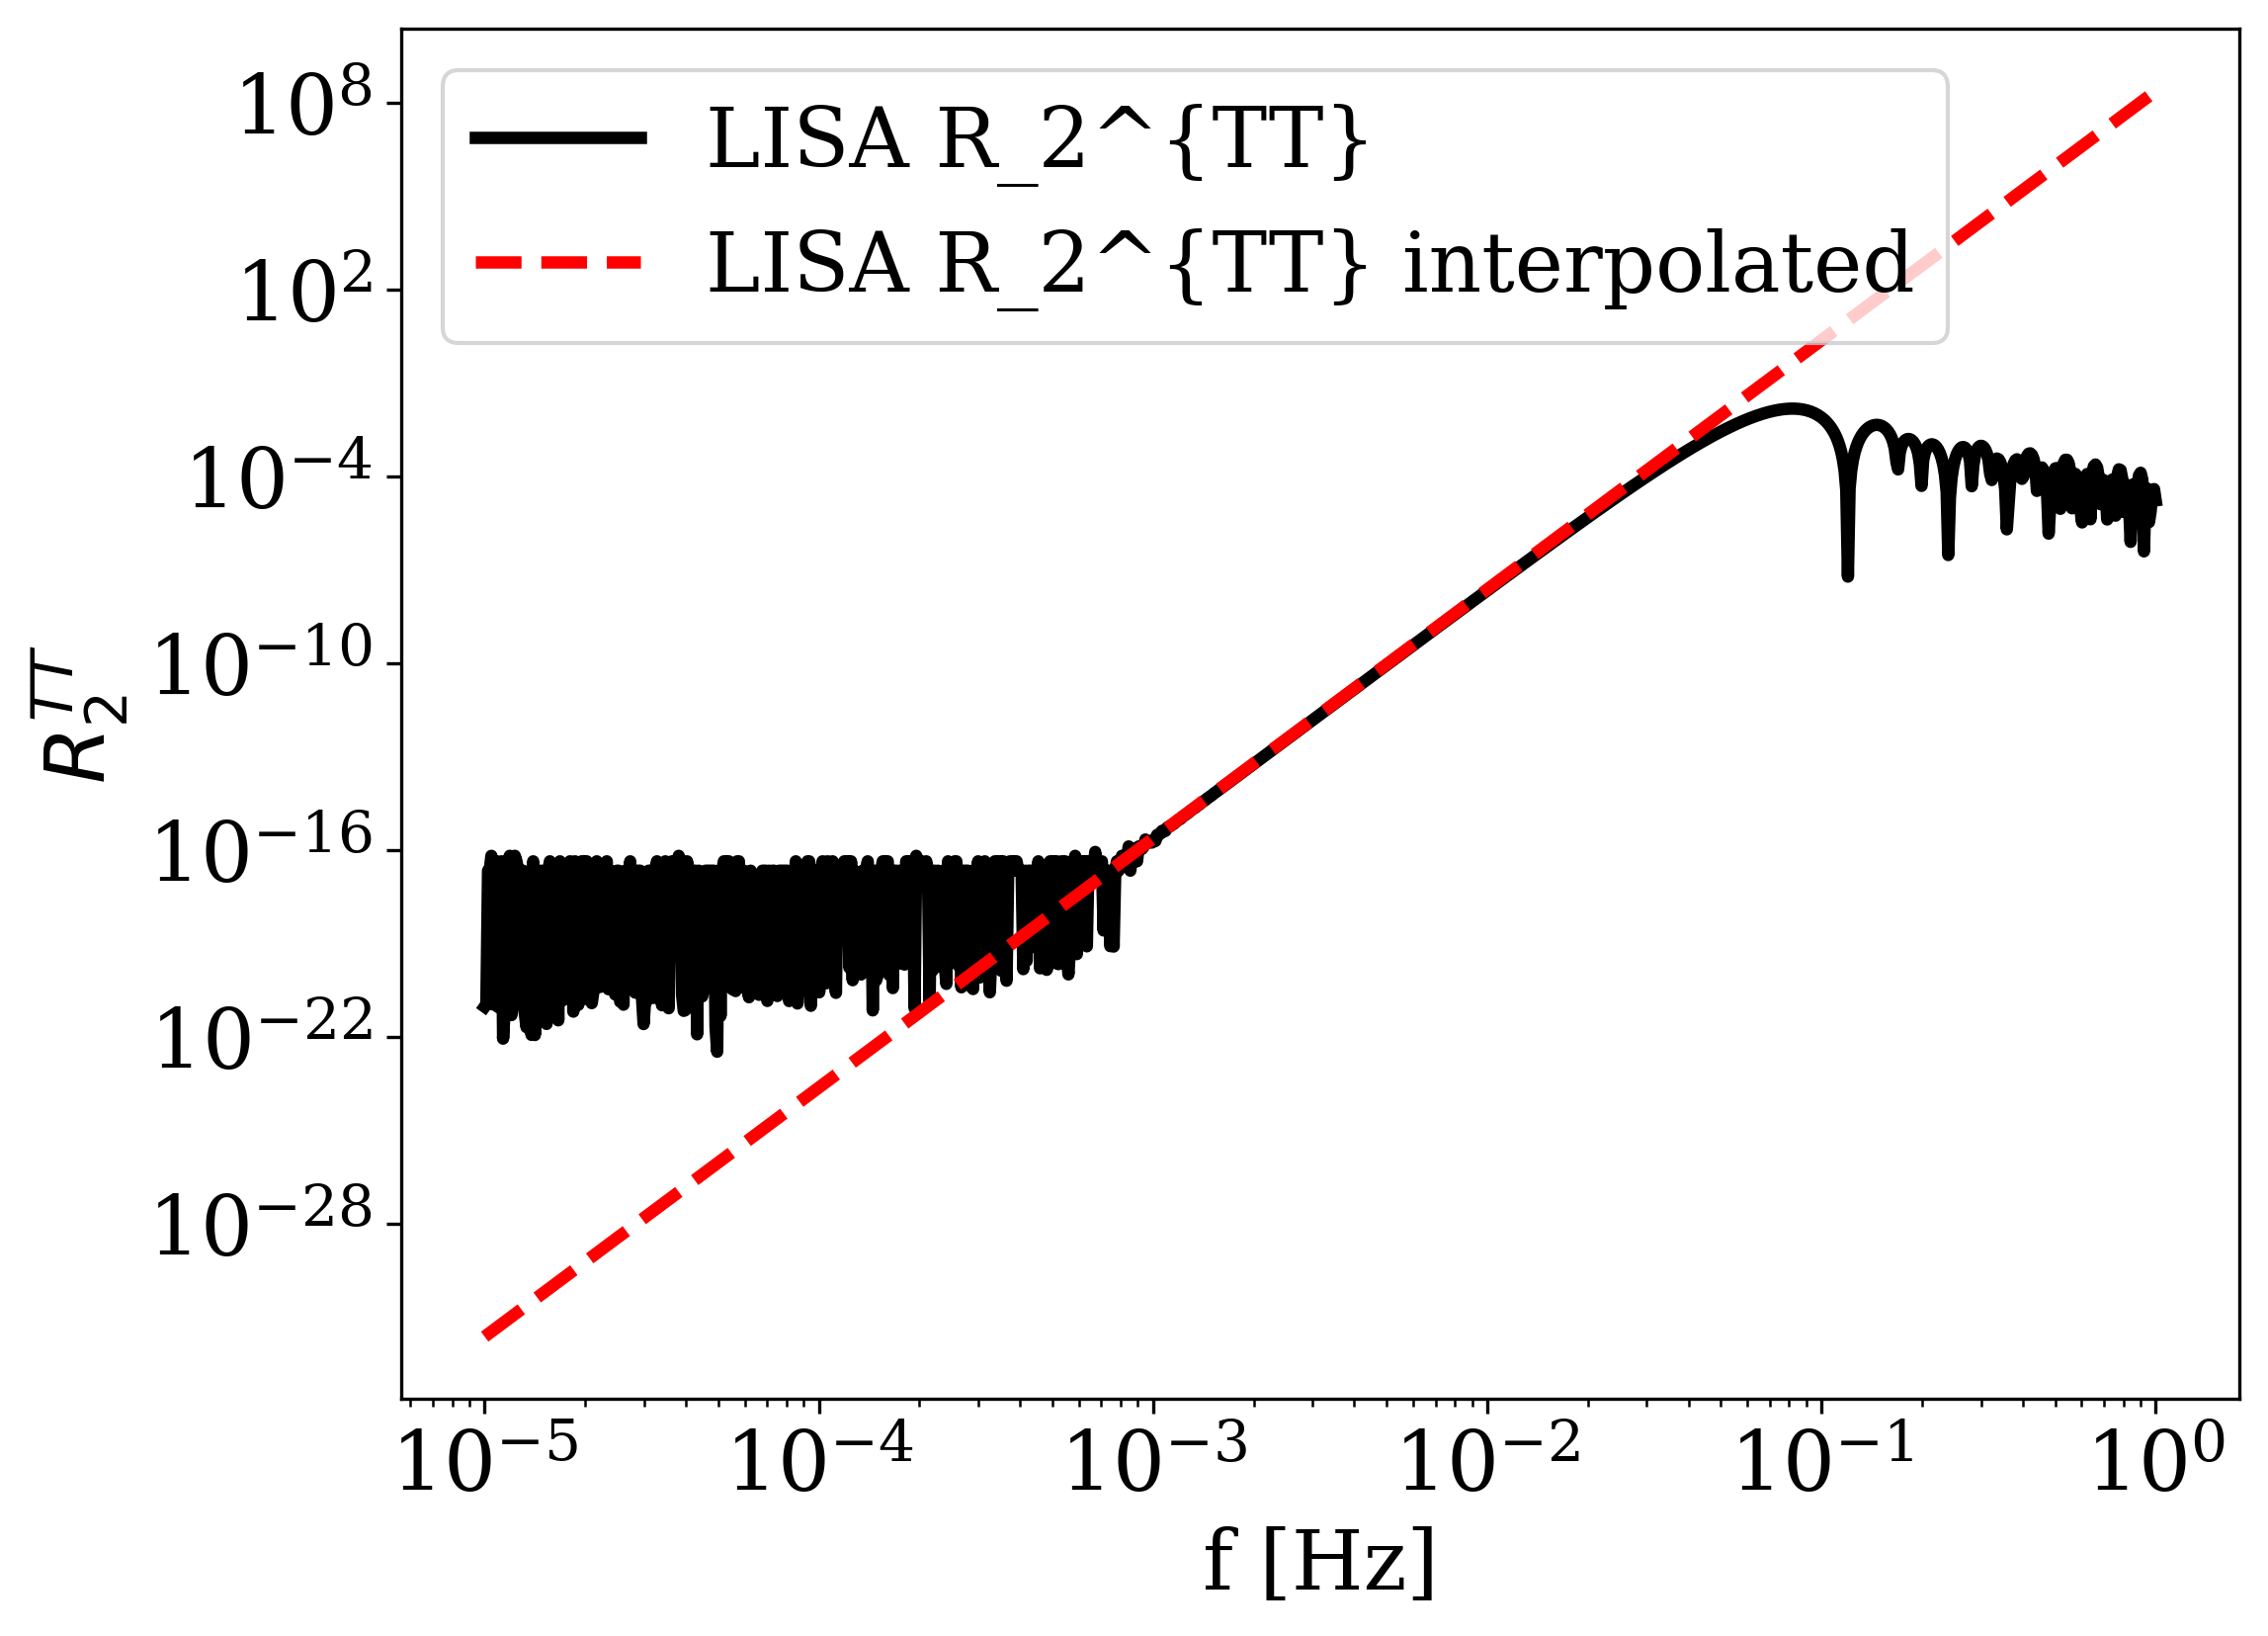

In [18]:
# plot 

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.loglog(f, LISA_Rell_2_TT, label='LISA R_2^{TT}', color='black')
plt.loglog(f, LISA_Rell_2_TT_interpolated, label='LISA R_2^{TT} interpolated', color='red', linestyle='--')
plt.xlabel('f [Hz]')
plt.ylabel(r'$R_2^{TT}$')
plt.legend()


# R_3 AE

In [19]:
LISA_Rell_3_AE = nell.AngularResponse.R_ell_AET(3, 'AE', 't', f)
LISA_Rell_3_AE_interpolated = np.sqrt(7/30)*x/8

AE
starting AE
-3
-2
-1
0
1
2
3


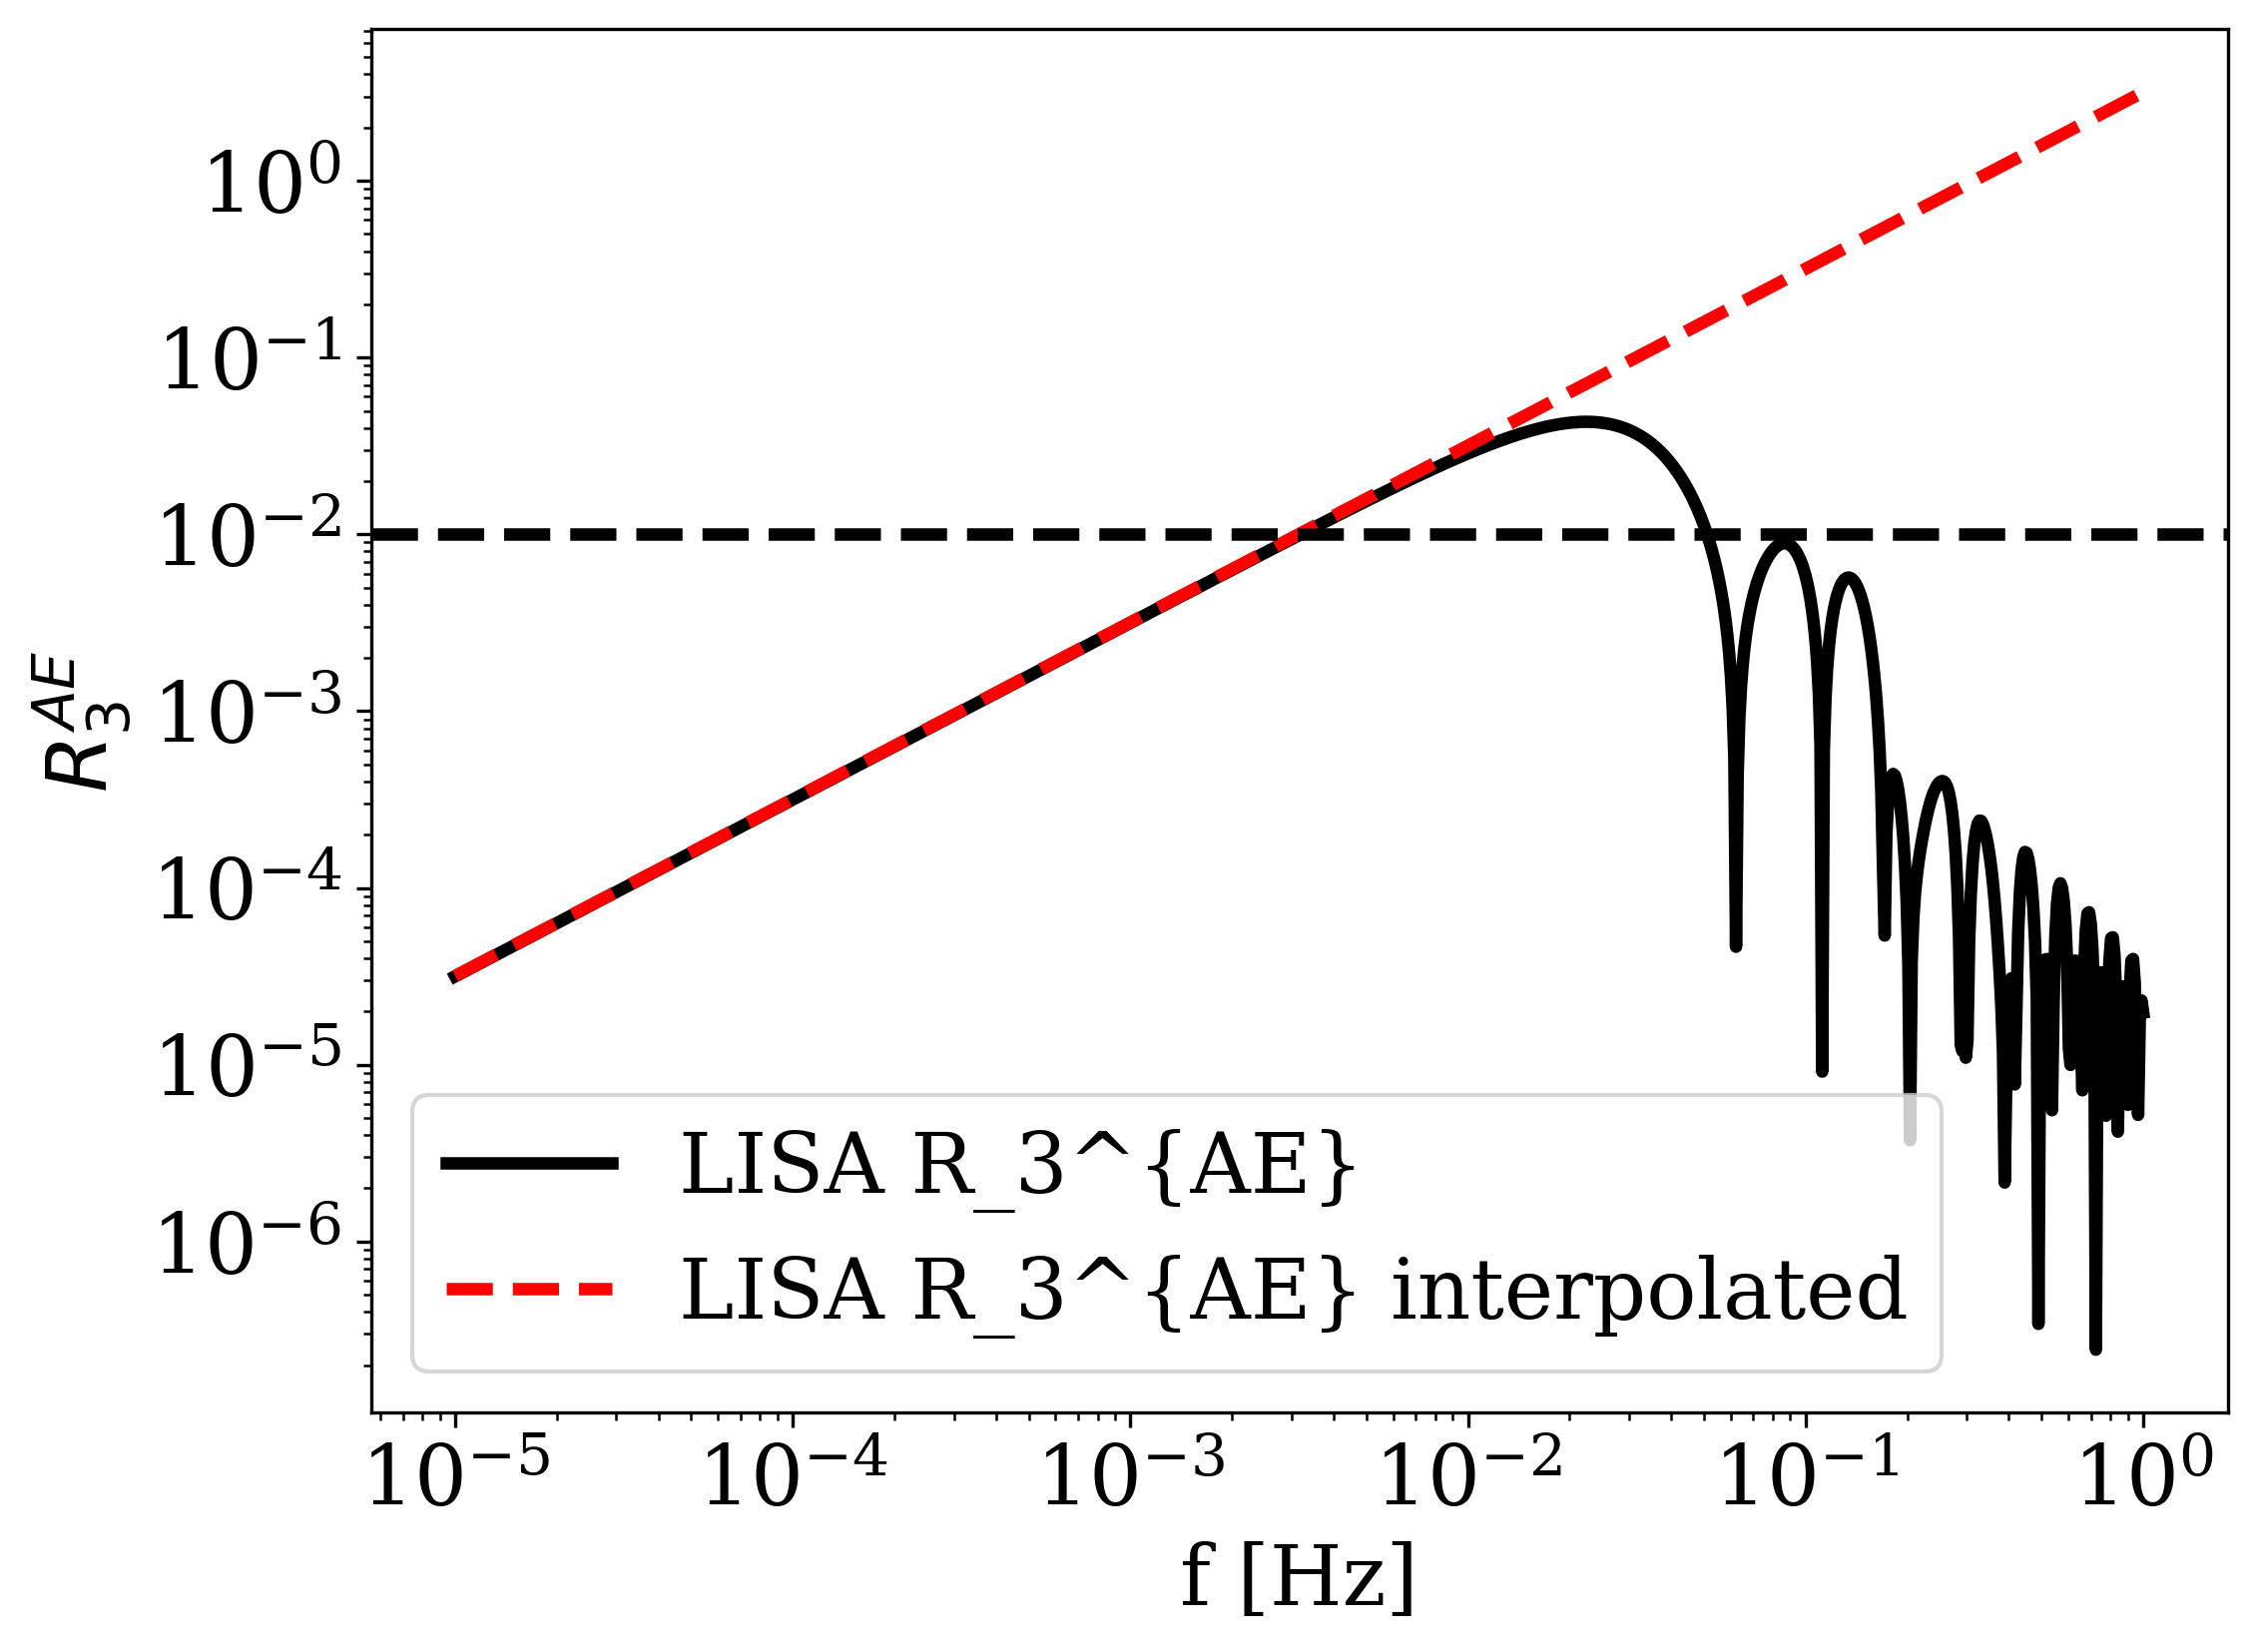

In [59]:
# plot

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.loglog(f, LISA_Rell_3_AE, label='LISA R_3^{AE}', color='black')
plt.loglog(f, LISA_Rell_3_AE_interpolated, label='LISA R_3^{AE} interpolated', color='red', linestyle='--')
plt.xlabel('f [Hz]')
plt.ylabel(r'$R_3^{AE}$')
plt.axhline(1e-2, color='k', linestyle='--')
plt.legend()

# R_1 AT

In [21]:
LISA_Rell_1_AT = nell.AngularResponse.R_ell_AET(1, 'AT', 't', f)
LISA_Rell_1_AT_interpolated = x**3/(112*np.sqrt(2))

AT
starting AT
-1
0
1


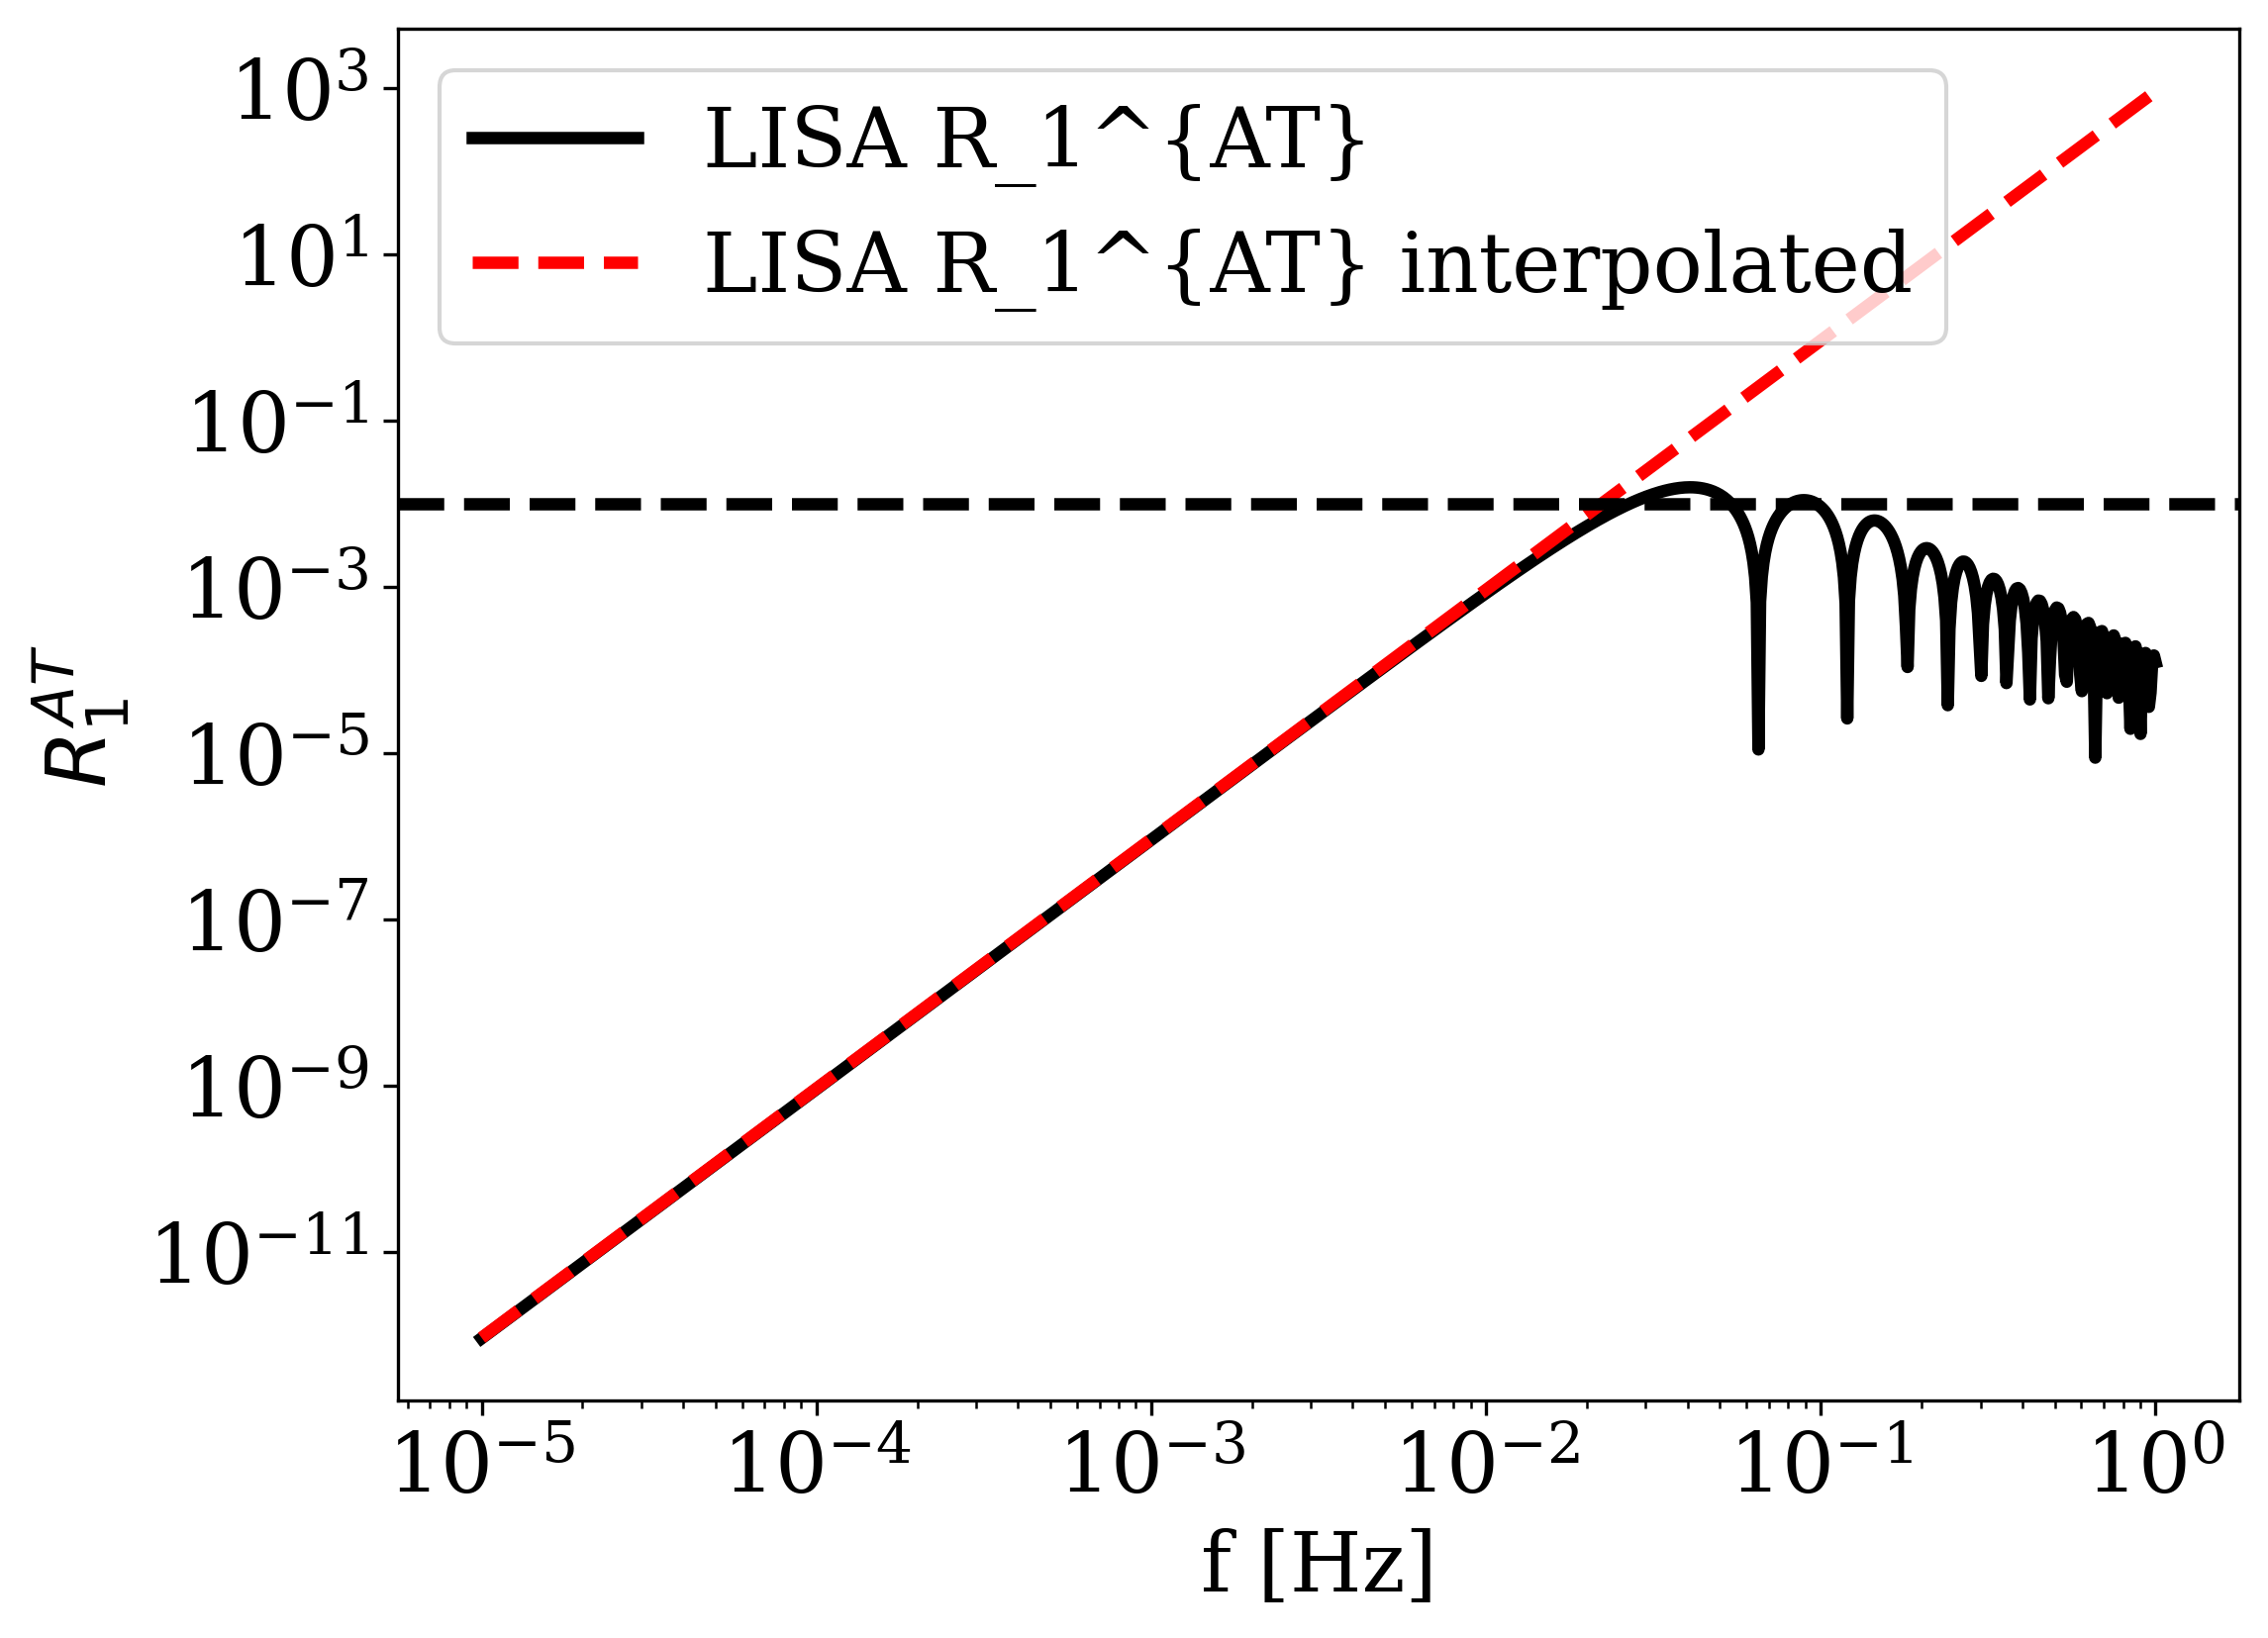

In [57]:
# plot

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.loglog(f, LISA_Rell_1_AT, label='LISA R_1^{AT}', color='black')
plt.loglog(f, LISA_Rell_1_AT_interpolated, label='LISA R_1^{AT} interpolated', color='red', linestyle='--')
plt.xlabel('f [Hz]')
plt.ylabel(r'$R_1^{AT}$')
plt.axhline(1e-2, color='k', linestyle='--')
plt.legend()



# R_3 AT

In [23]:
LISA_Rell_3_AT = nell.AngularResponse.R_ell_AET(3, 'AT', 't', f)
LISA_Rell_3_AT_interpolated = x**3/(96*np.sqrt(7))

AT
starting AT
-3
-2
-1
0
1
2
3


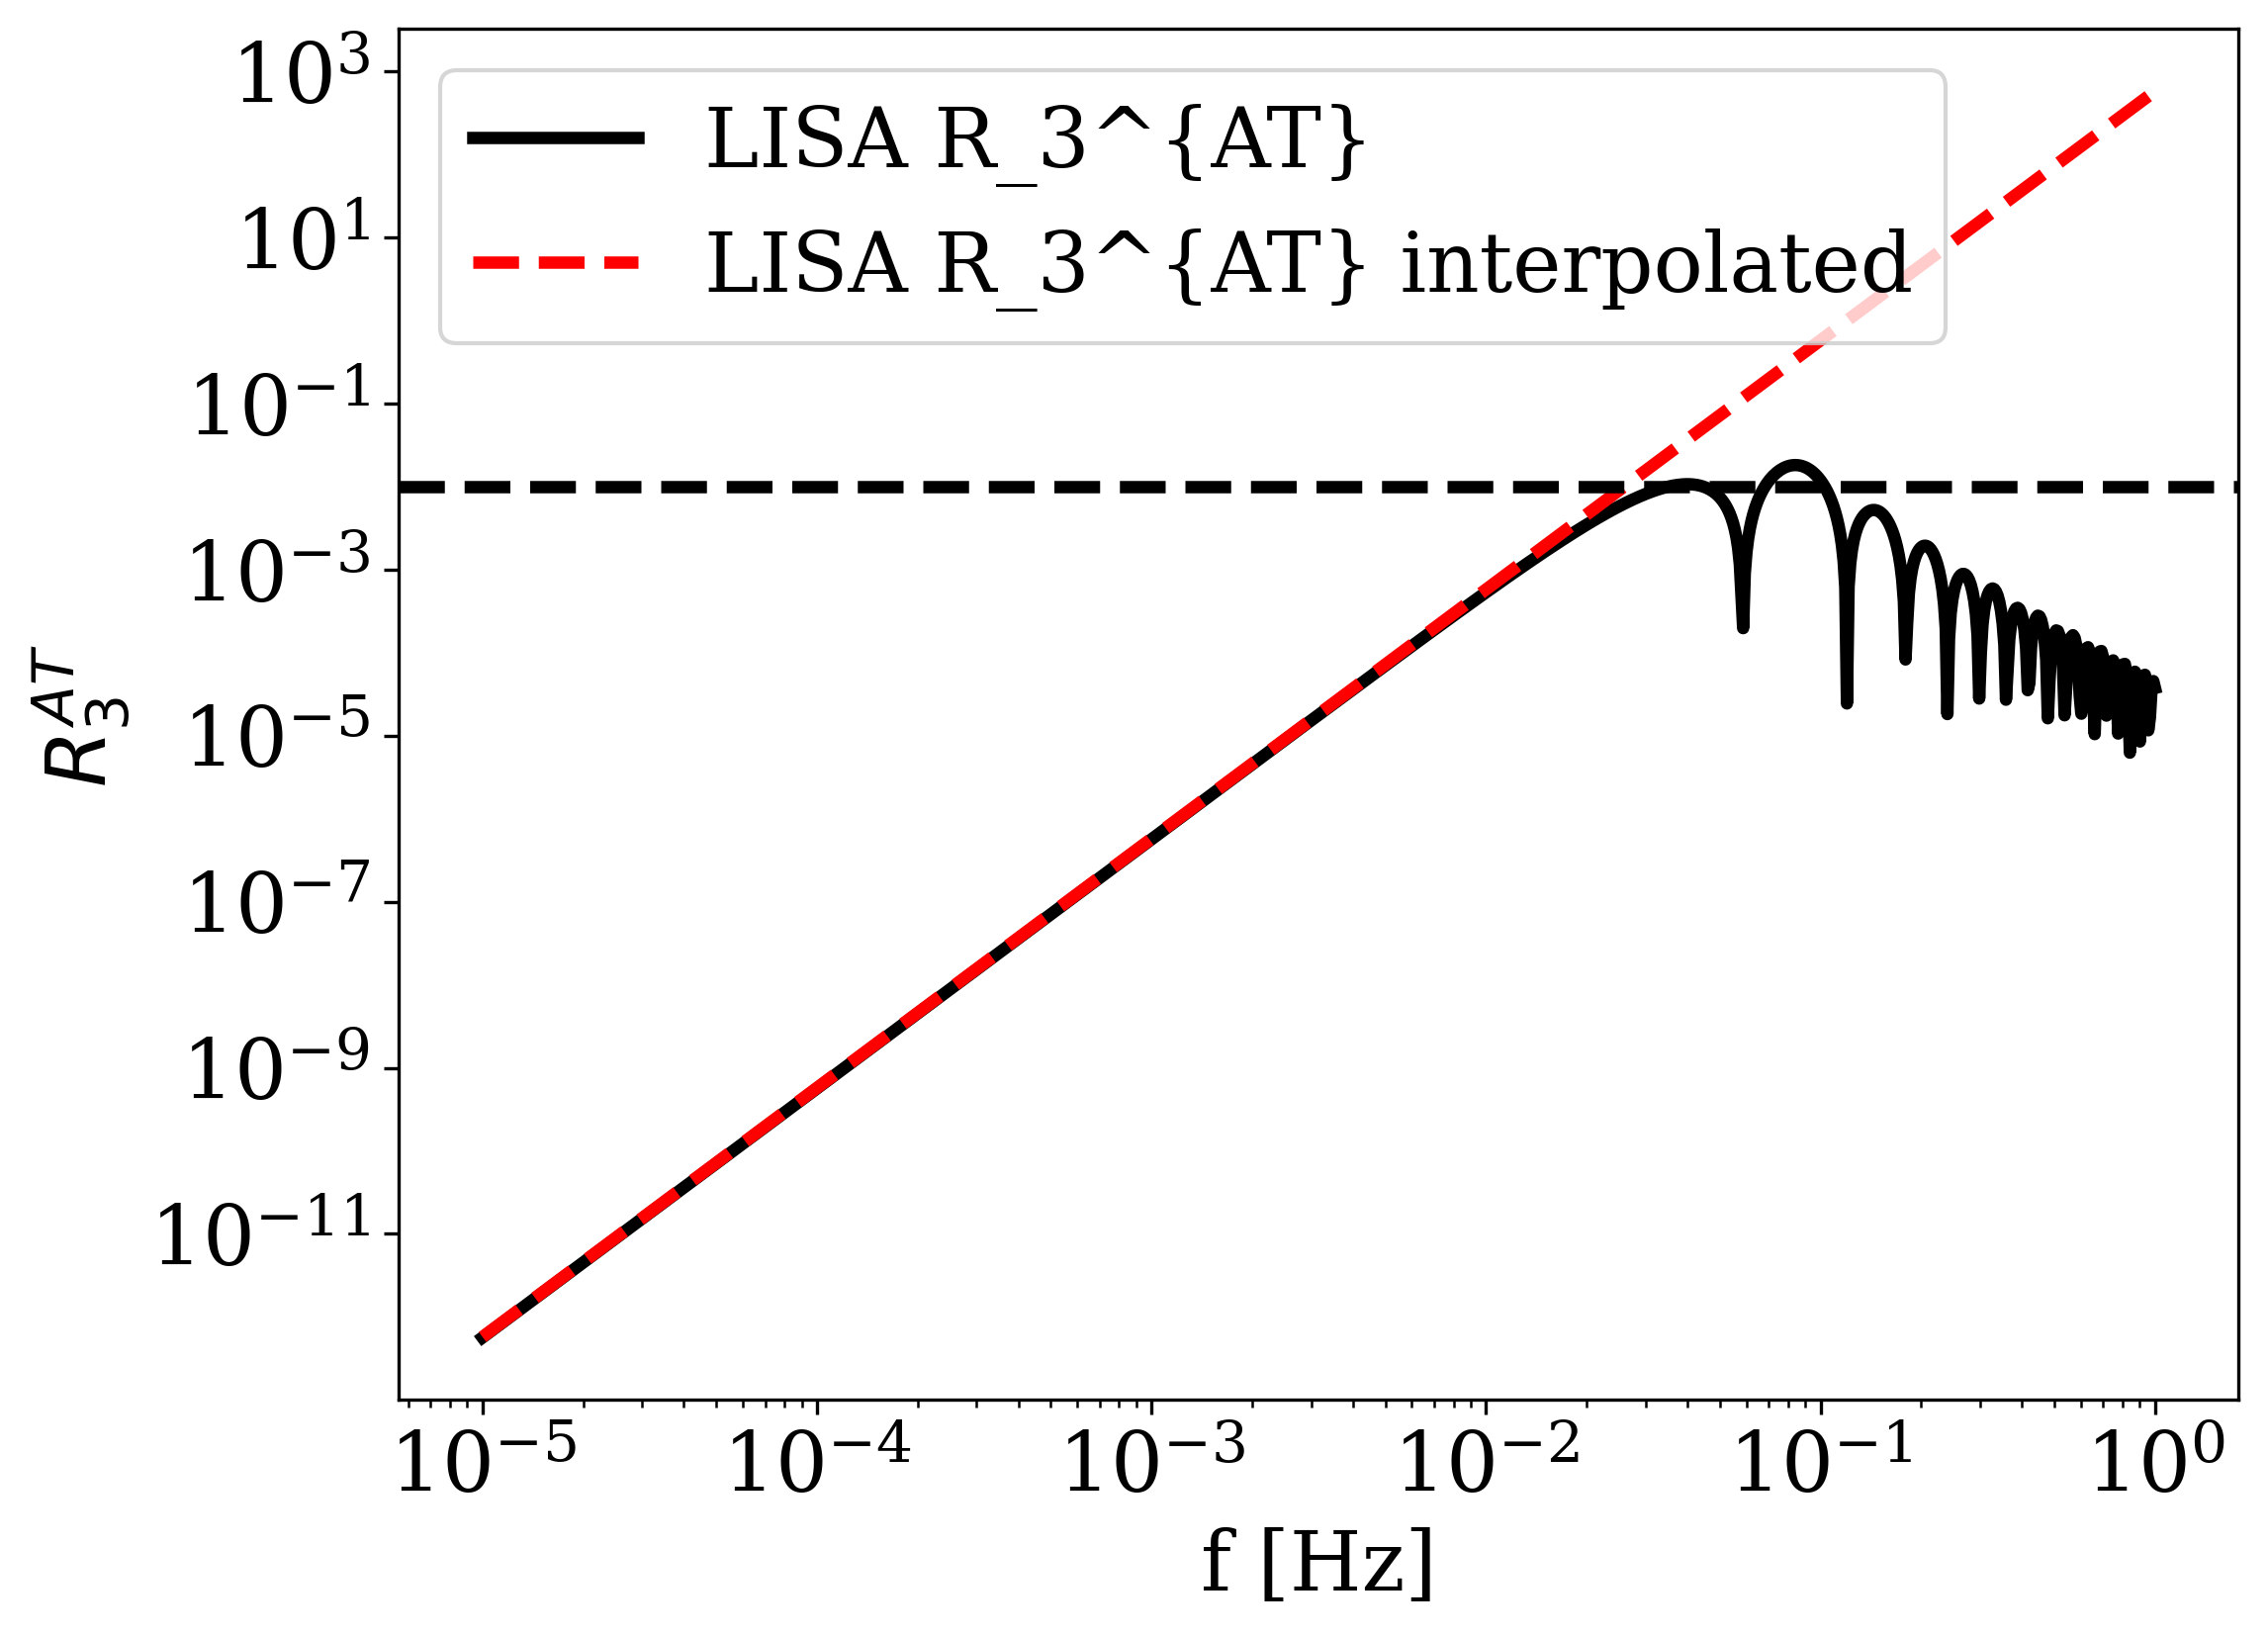

In [58]:
# plot

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.loglog(f, LISA_Rell_3_AT, label='LISA R_3^{AT}', color='black')
plt.loglog(f, LISA_Rell_3_AT_interpolated, label='LISA R_3^{AT} interpolated', color='red', linestyle='--')
plt.xlabel('f [Hz]')
plt.axhline(1e-2, color='k', linestyle='--')
plt.ylabel(r'$R_3^{AT}$')
plt.legend()

# R_4 AA

In [25]:
LISA_Rell_4_AA = nell.AngularResponse.R_ell_AET(4, 'AA', 't', f)
LISA_Rell_4_AA_interpolated =9/140 - 3719 * x**2 / 147840

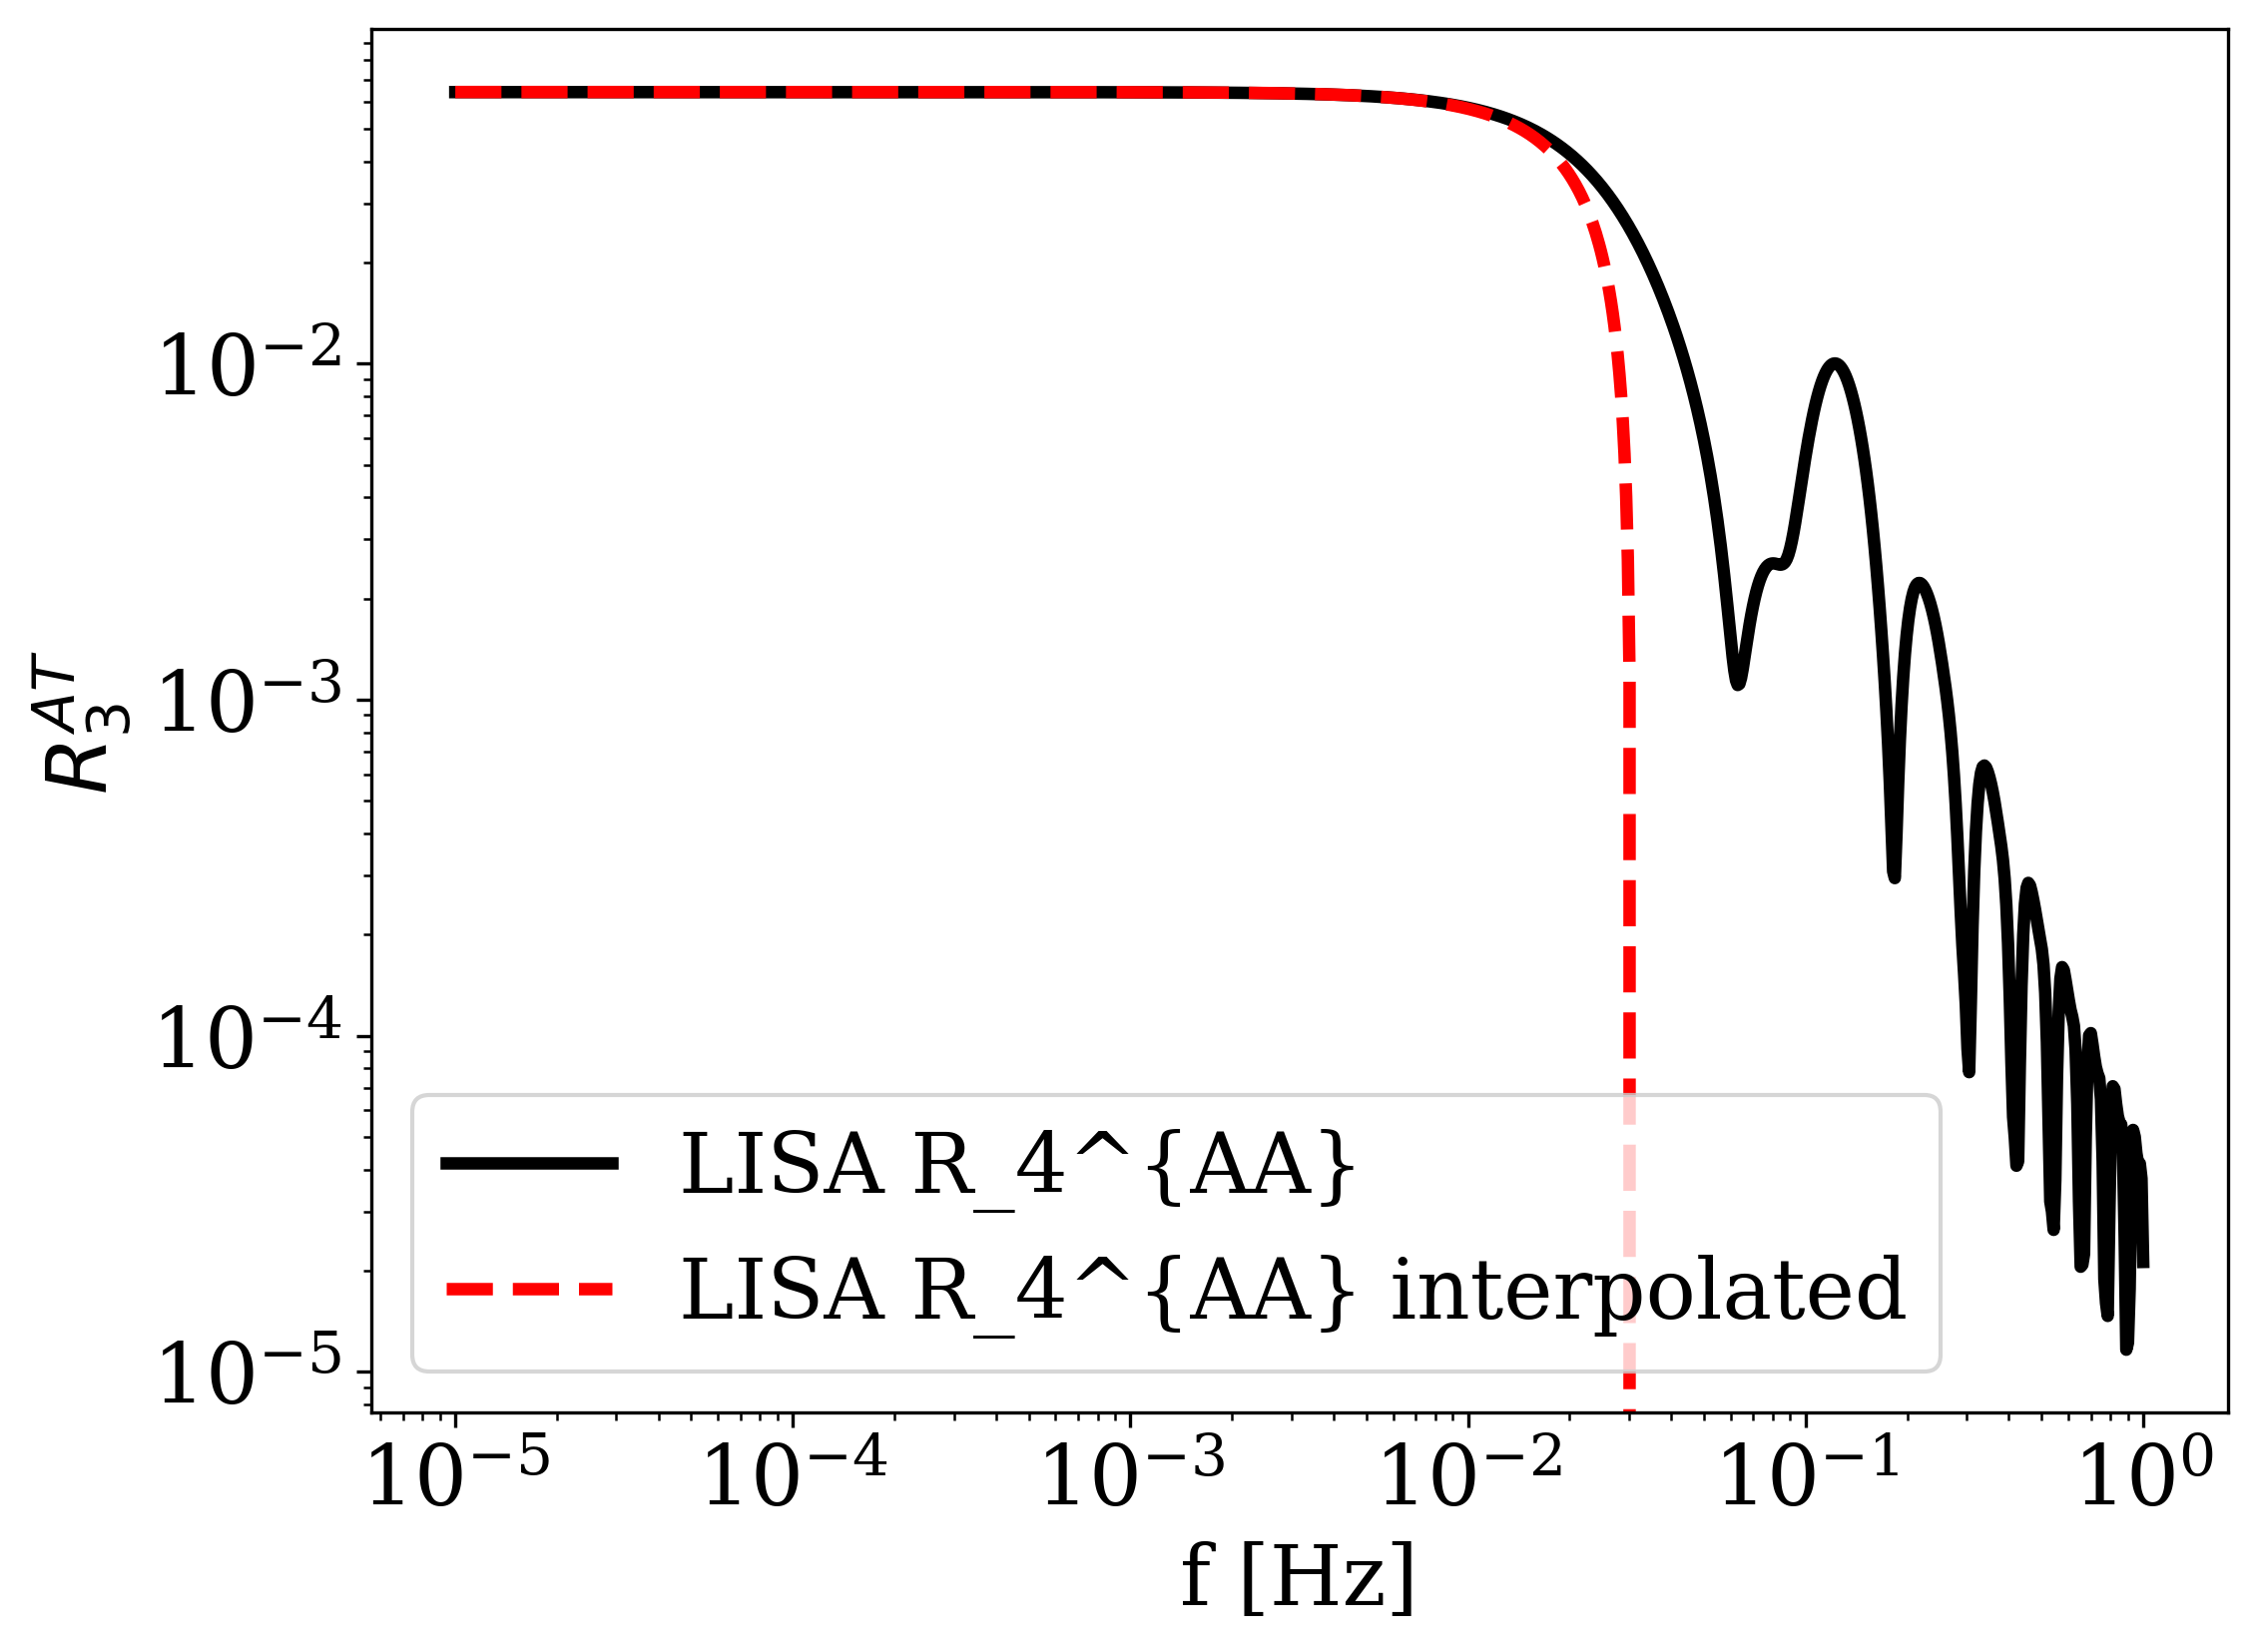

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.loglog(f, LISA_Rell_4_AA, label='LISA R_4^{AA}', color='black')
plt.loglog(f, LISA_Rell_4_AA_interpolated, label='LISA R_4^{AA} interpolated', color='red', linestyle='--')
plt.xlabel('f [Hz]')
plt.ylabel(r'$R_3^{AT}$')
plt.legend()

# R_5 AE

In [27]:
LISA_Rell_5_AE = nell.AngularResponse.R_ell_AET(5, 'AE', 't', f)
LISA_Rell_5_AE_interpolated = x / 8 / np.sqrt(2310)

AE
starting AE
-5
-4
-3
-2
-1
0
1
2
3
4
5


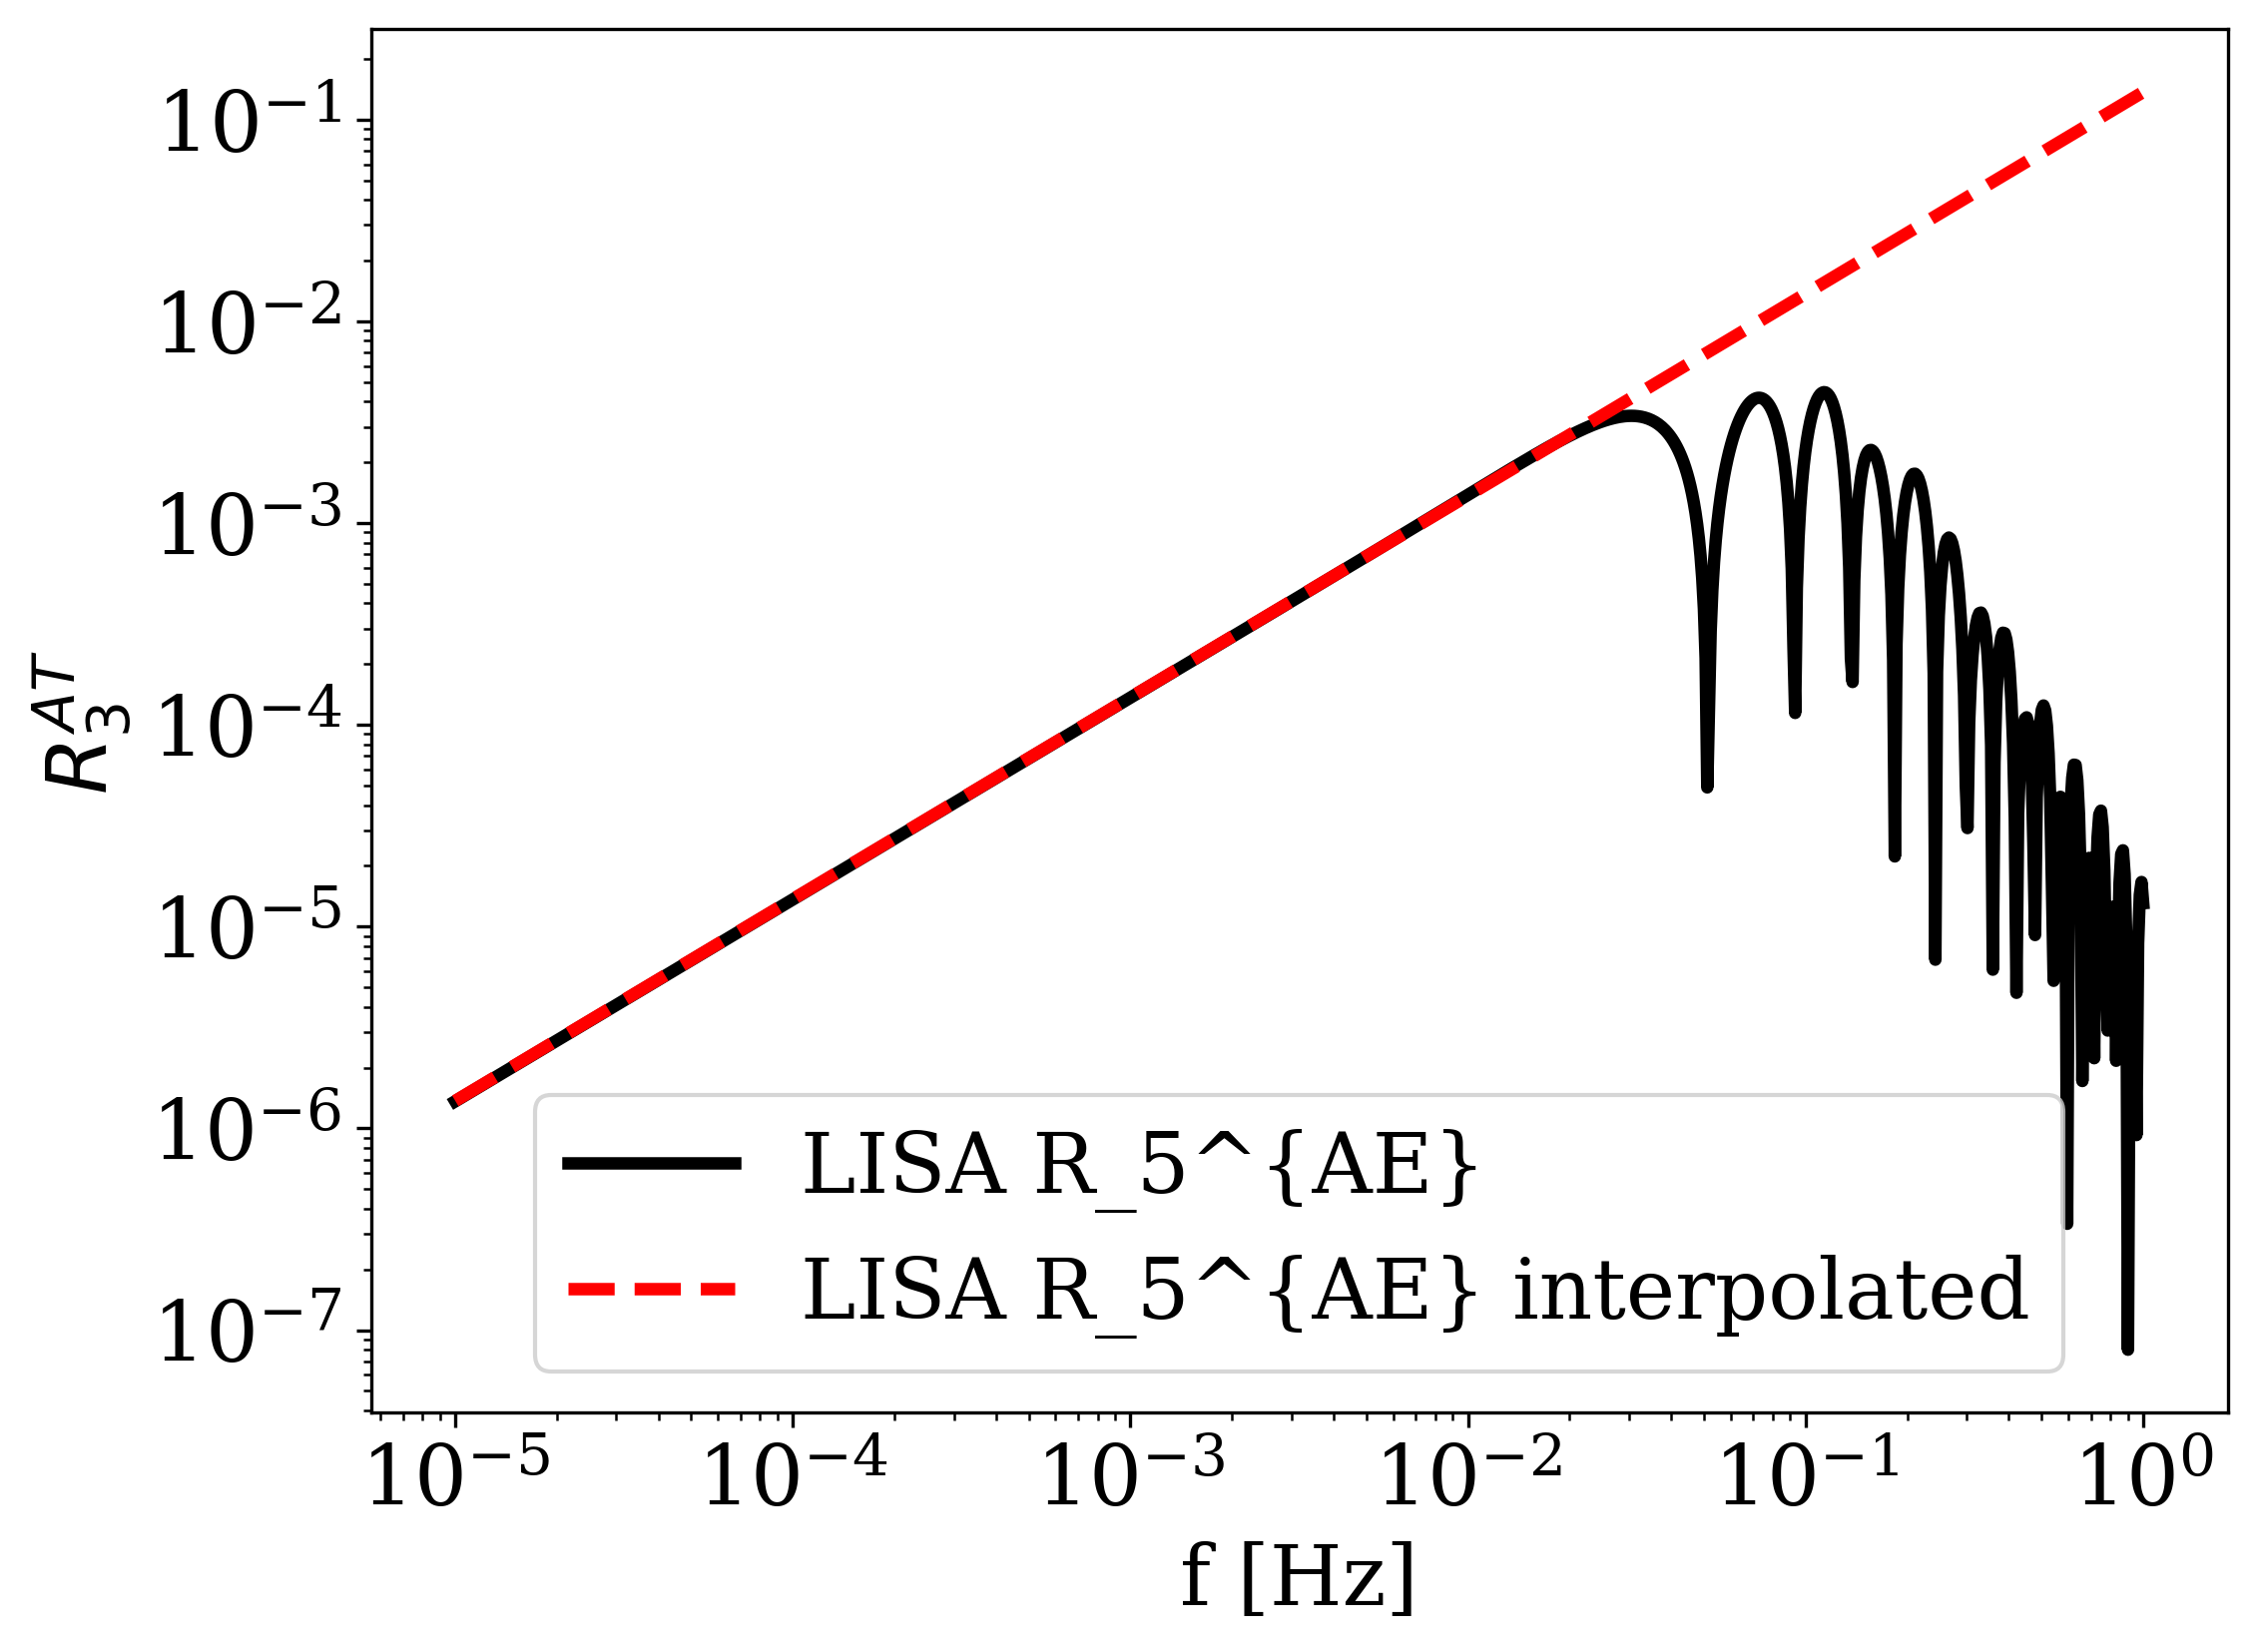

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.loglog(f, LISA_Rell_5_AE, label='LISA R_5^{AE}', color='black')
plt.loglog(f, LISA_Rell_5_AE_interpolated, label='LISA R_5^{AE} interpolated', color='red', linestyle='--')
plt.xlabel('f [Hz]')
plt.ylabel(r'$R_3^{AT}$')
plt.legend()

# R_5 AT

In [29]:
LISA_Rell_5_AT = nell.AngularResponse.R_ell_AET(5, 'AT', 't', f)
LISA_Rell_5_AT_interpolated =np.sqrt(211/110) * x**3 /672

AT
starting AT
-5
-4
-3
-2
-1
0
1
2
3
4
5


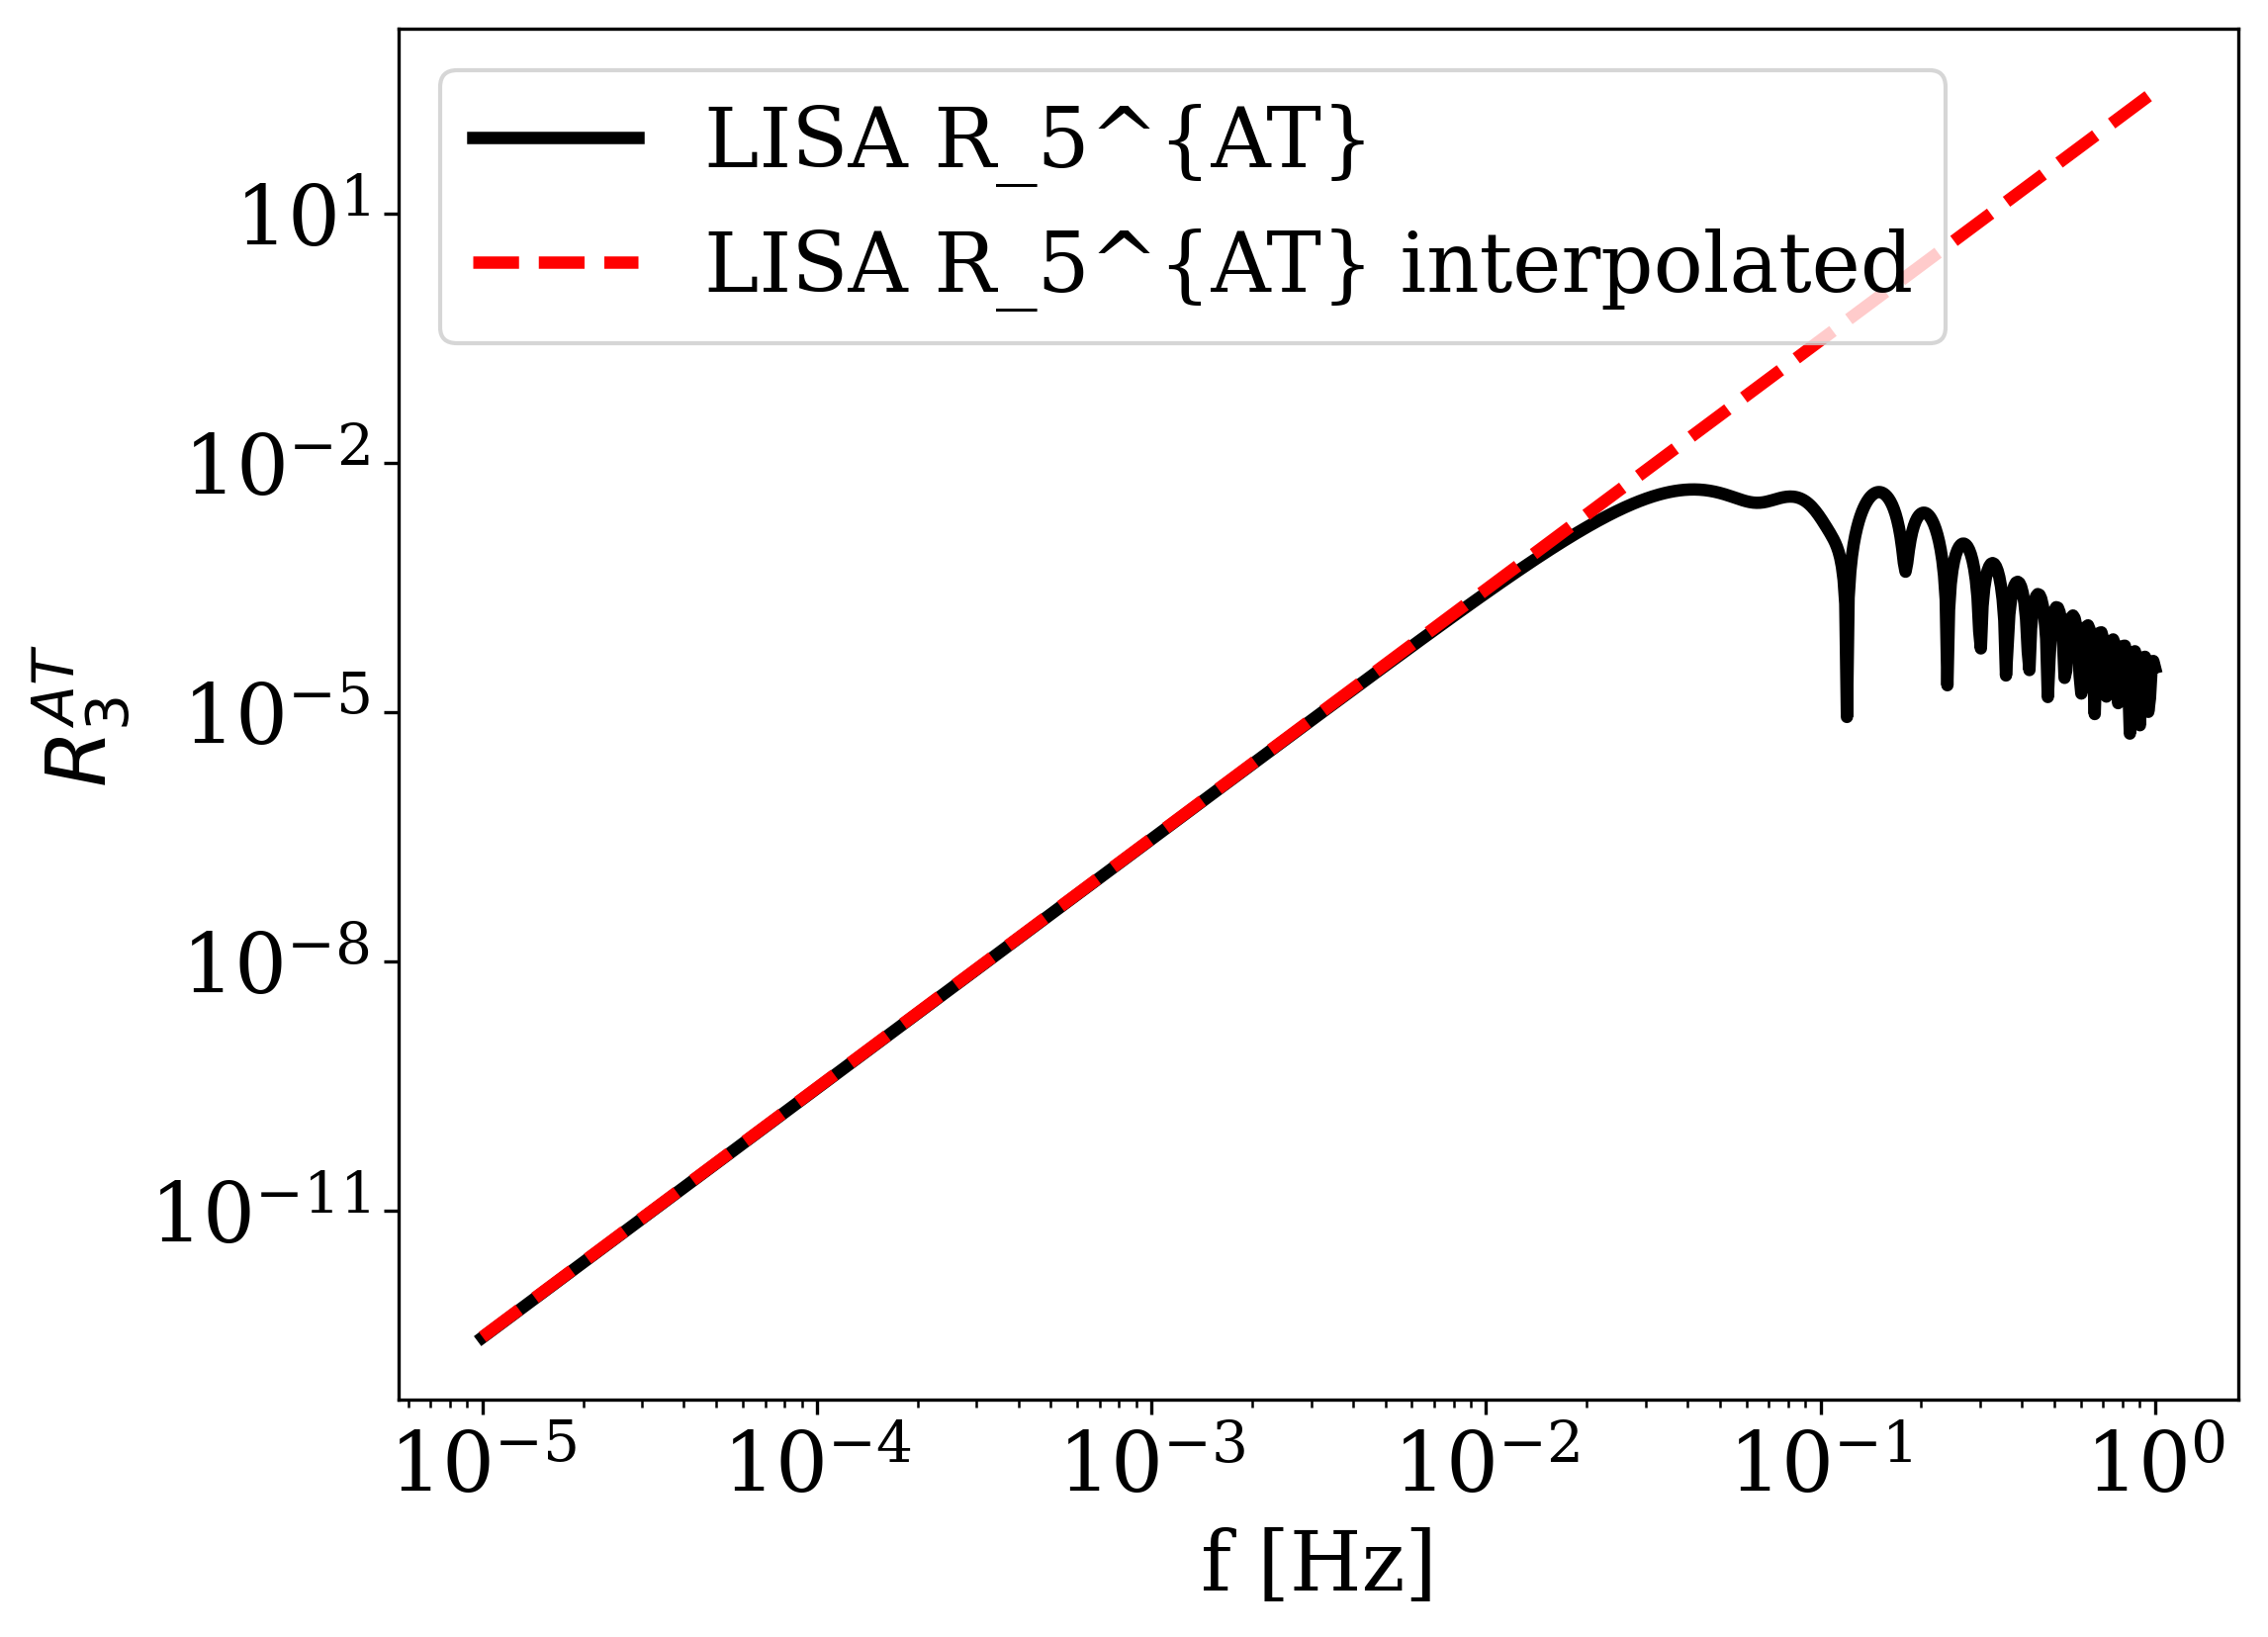

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.loglog(f, LISA_Rell_5_AT, label='LISA R_5^{AT}', color='black')
plt.loglog(f, LISA_Rell_5_AT_interpolated, label='LISA R_5^{AT} interpolated', color='red', linestyle='--')
plt.xlabel('f [Hz]')
plt.ylabel(r'$R_3^{AT}$')
plt.legend()

# R_6 AA

In [41]:
LISA_Rell_6_AA = nell.AngularResponse.R_ell_AET(6, 'AA', 't', f)
LISA_Rell_6_AA_interpolated = np.sqrt(1829/195) * x**2 /4928

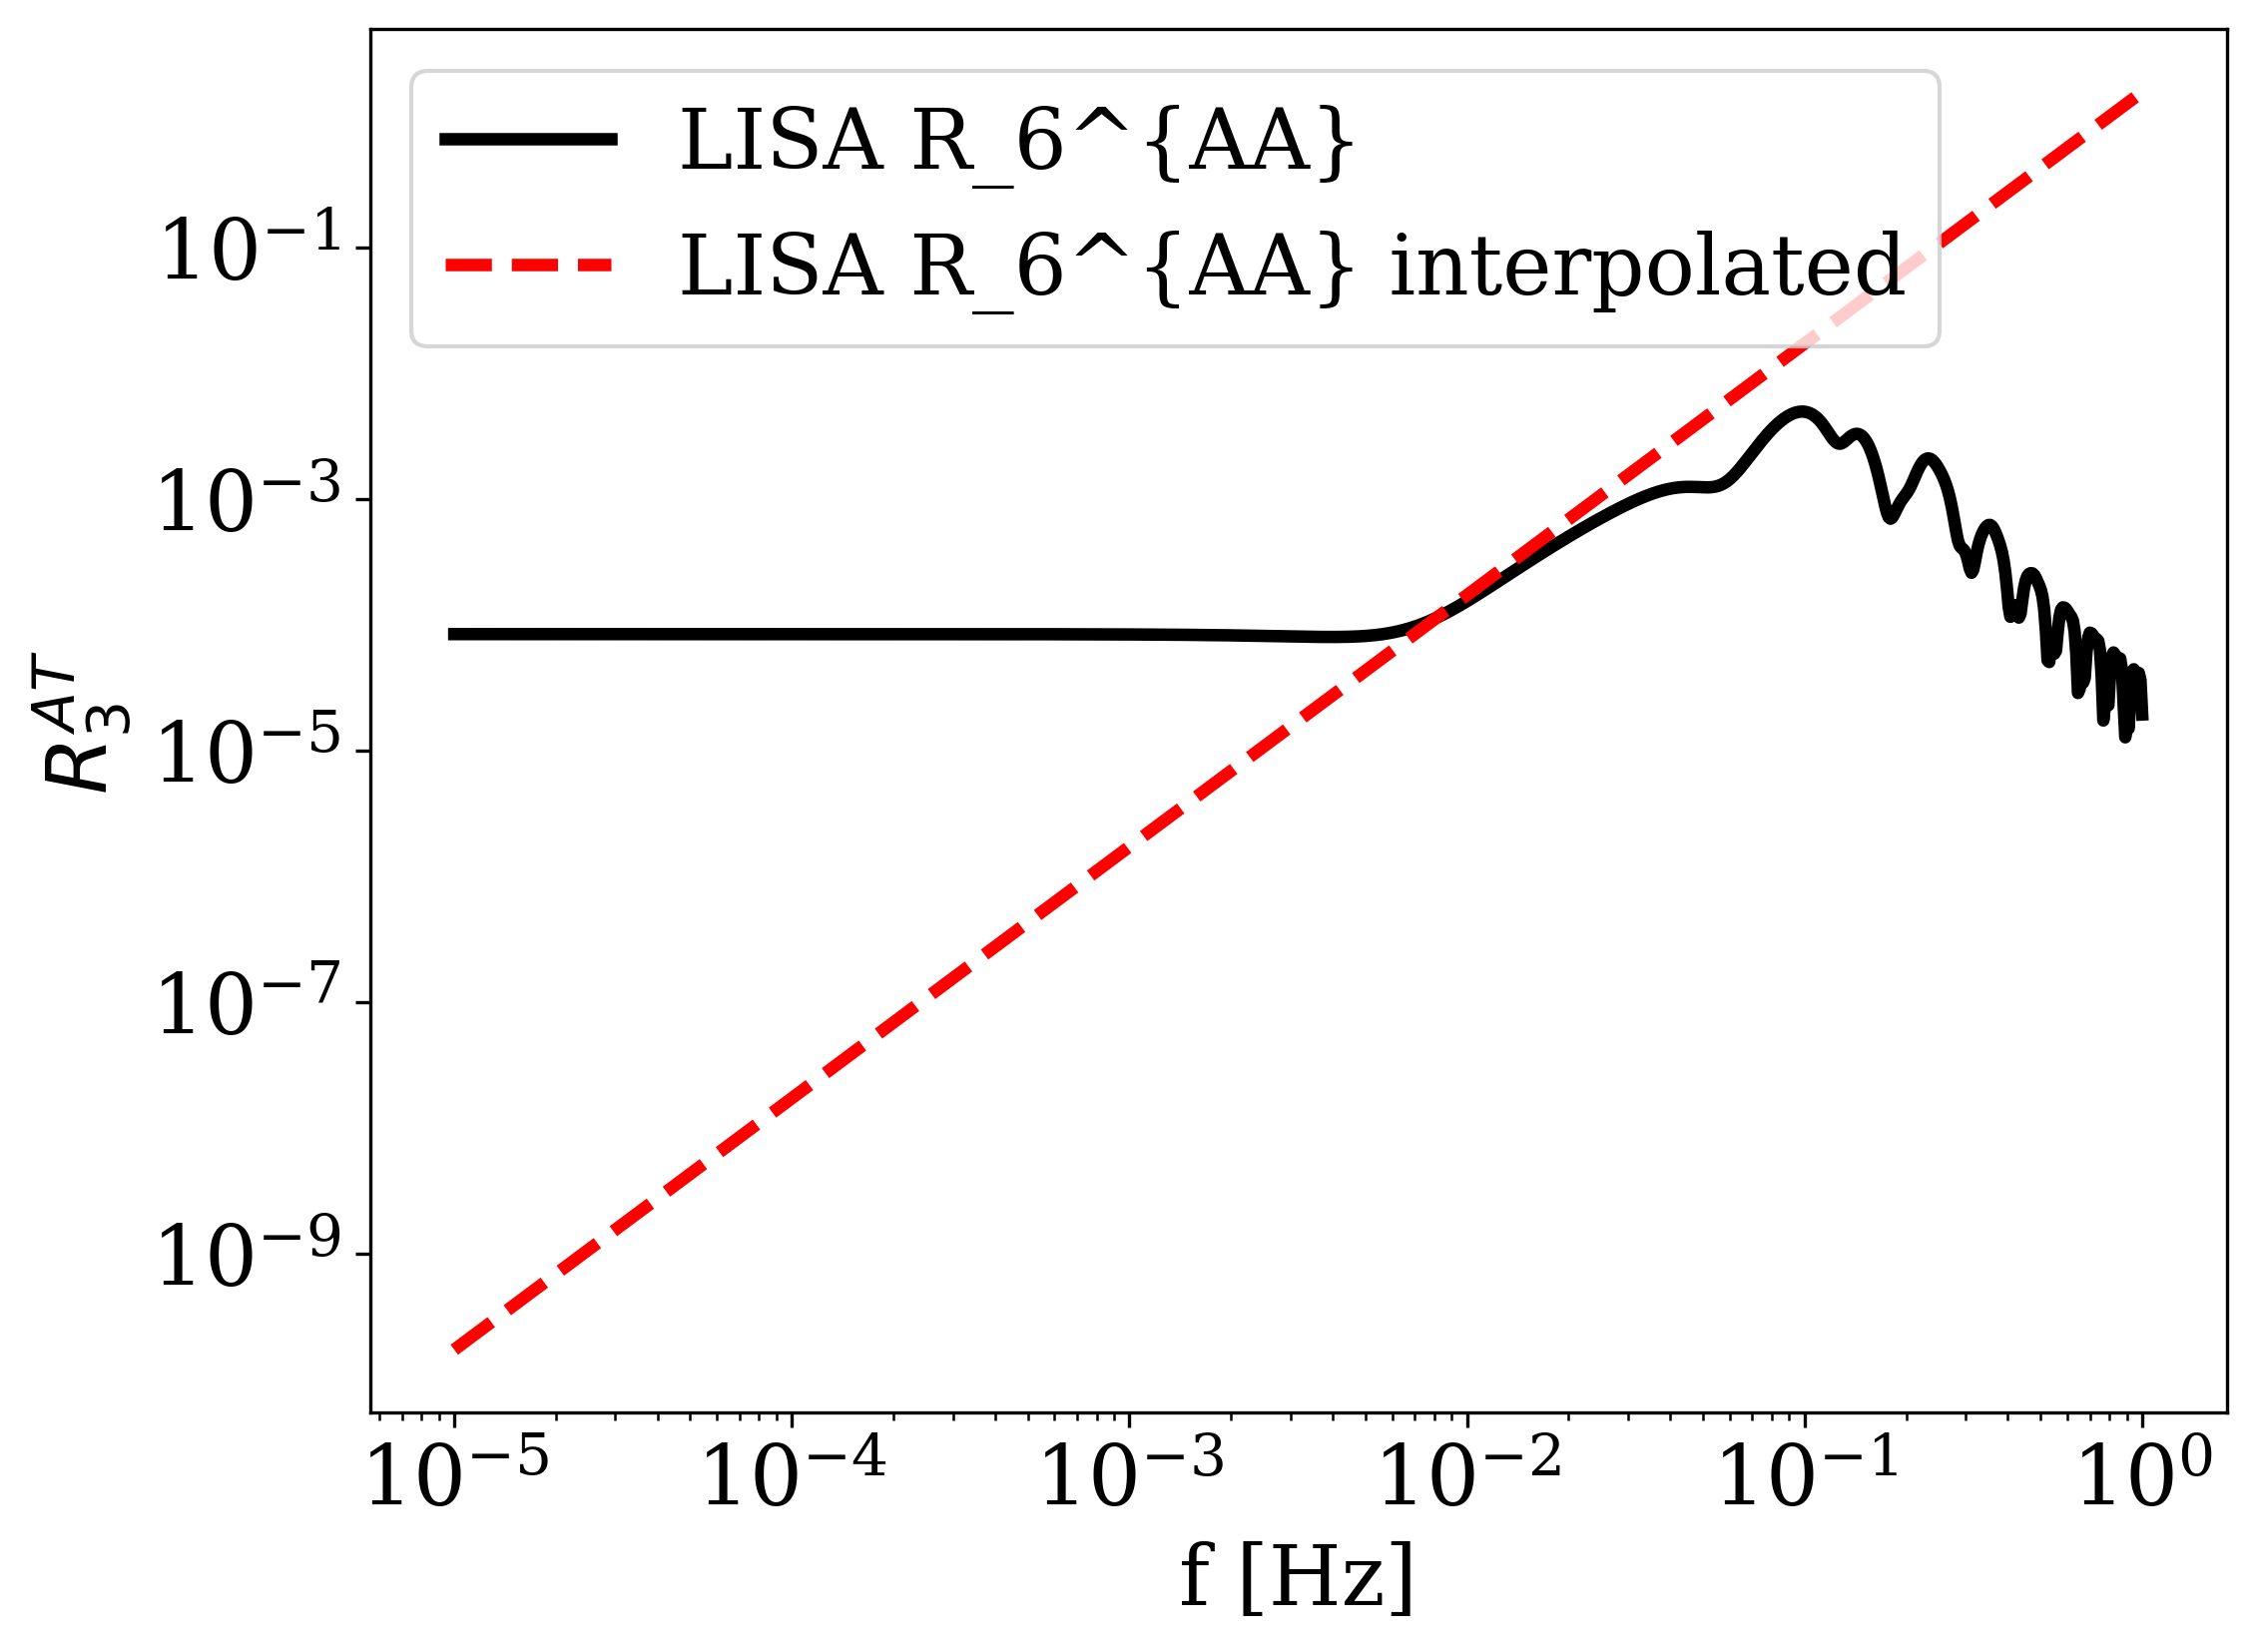

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.loglog(f, LISA_Rell_6_AA, label='LISA R_6^{AA}', color='black')
plt.loglog(f, LISA_Rell_6_AA_interpolated, label='LISA R_6^{AA} interpolated', color='red', linestyle='--')
plt.xlabel('f [Hz]')
plt.ylabel(r'$R_3^{AT}$')
plt.legend()

In [33]:
LISA_Rell_6_AE = nell.AngularResponse.R_ell_AET(6, 'AE', 't', f)
LISA_Rell_6_AE_interpolated = x**2 / 32 / np.sqrt(2730)

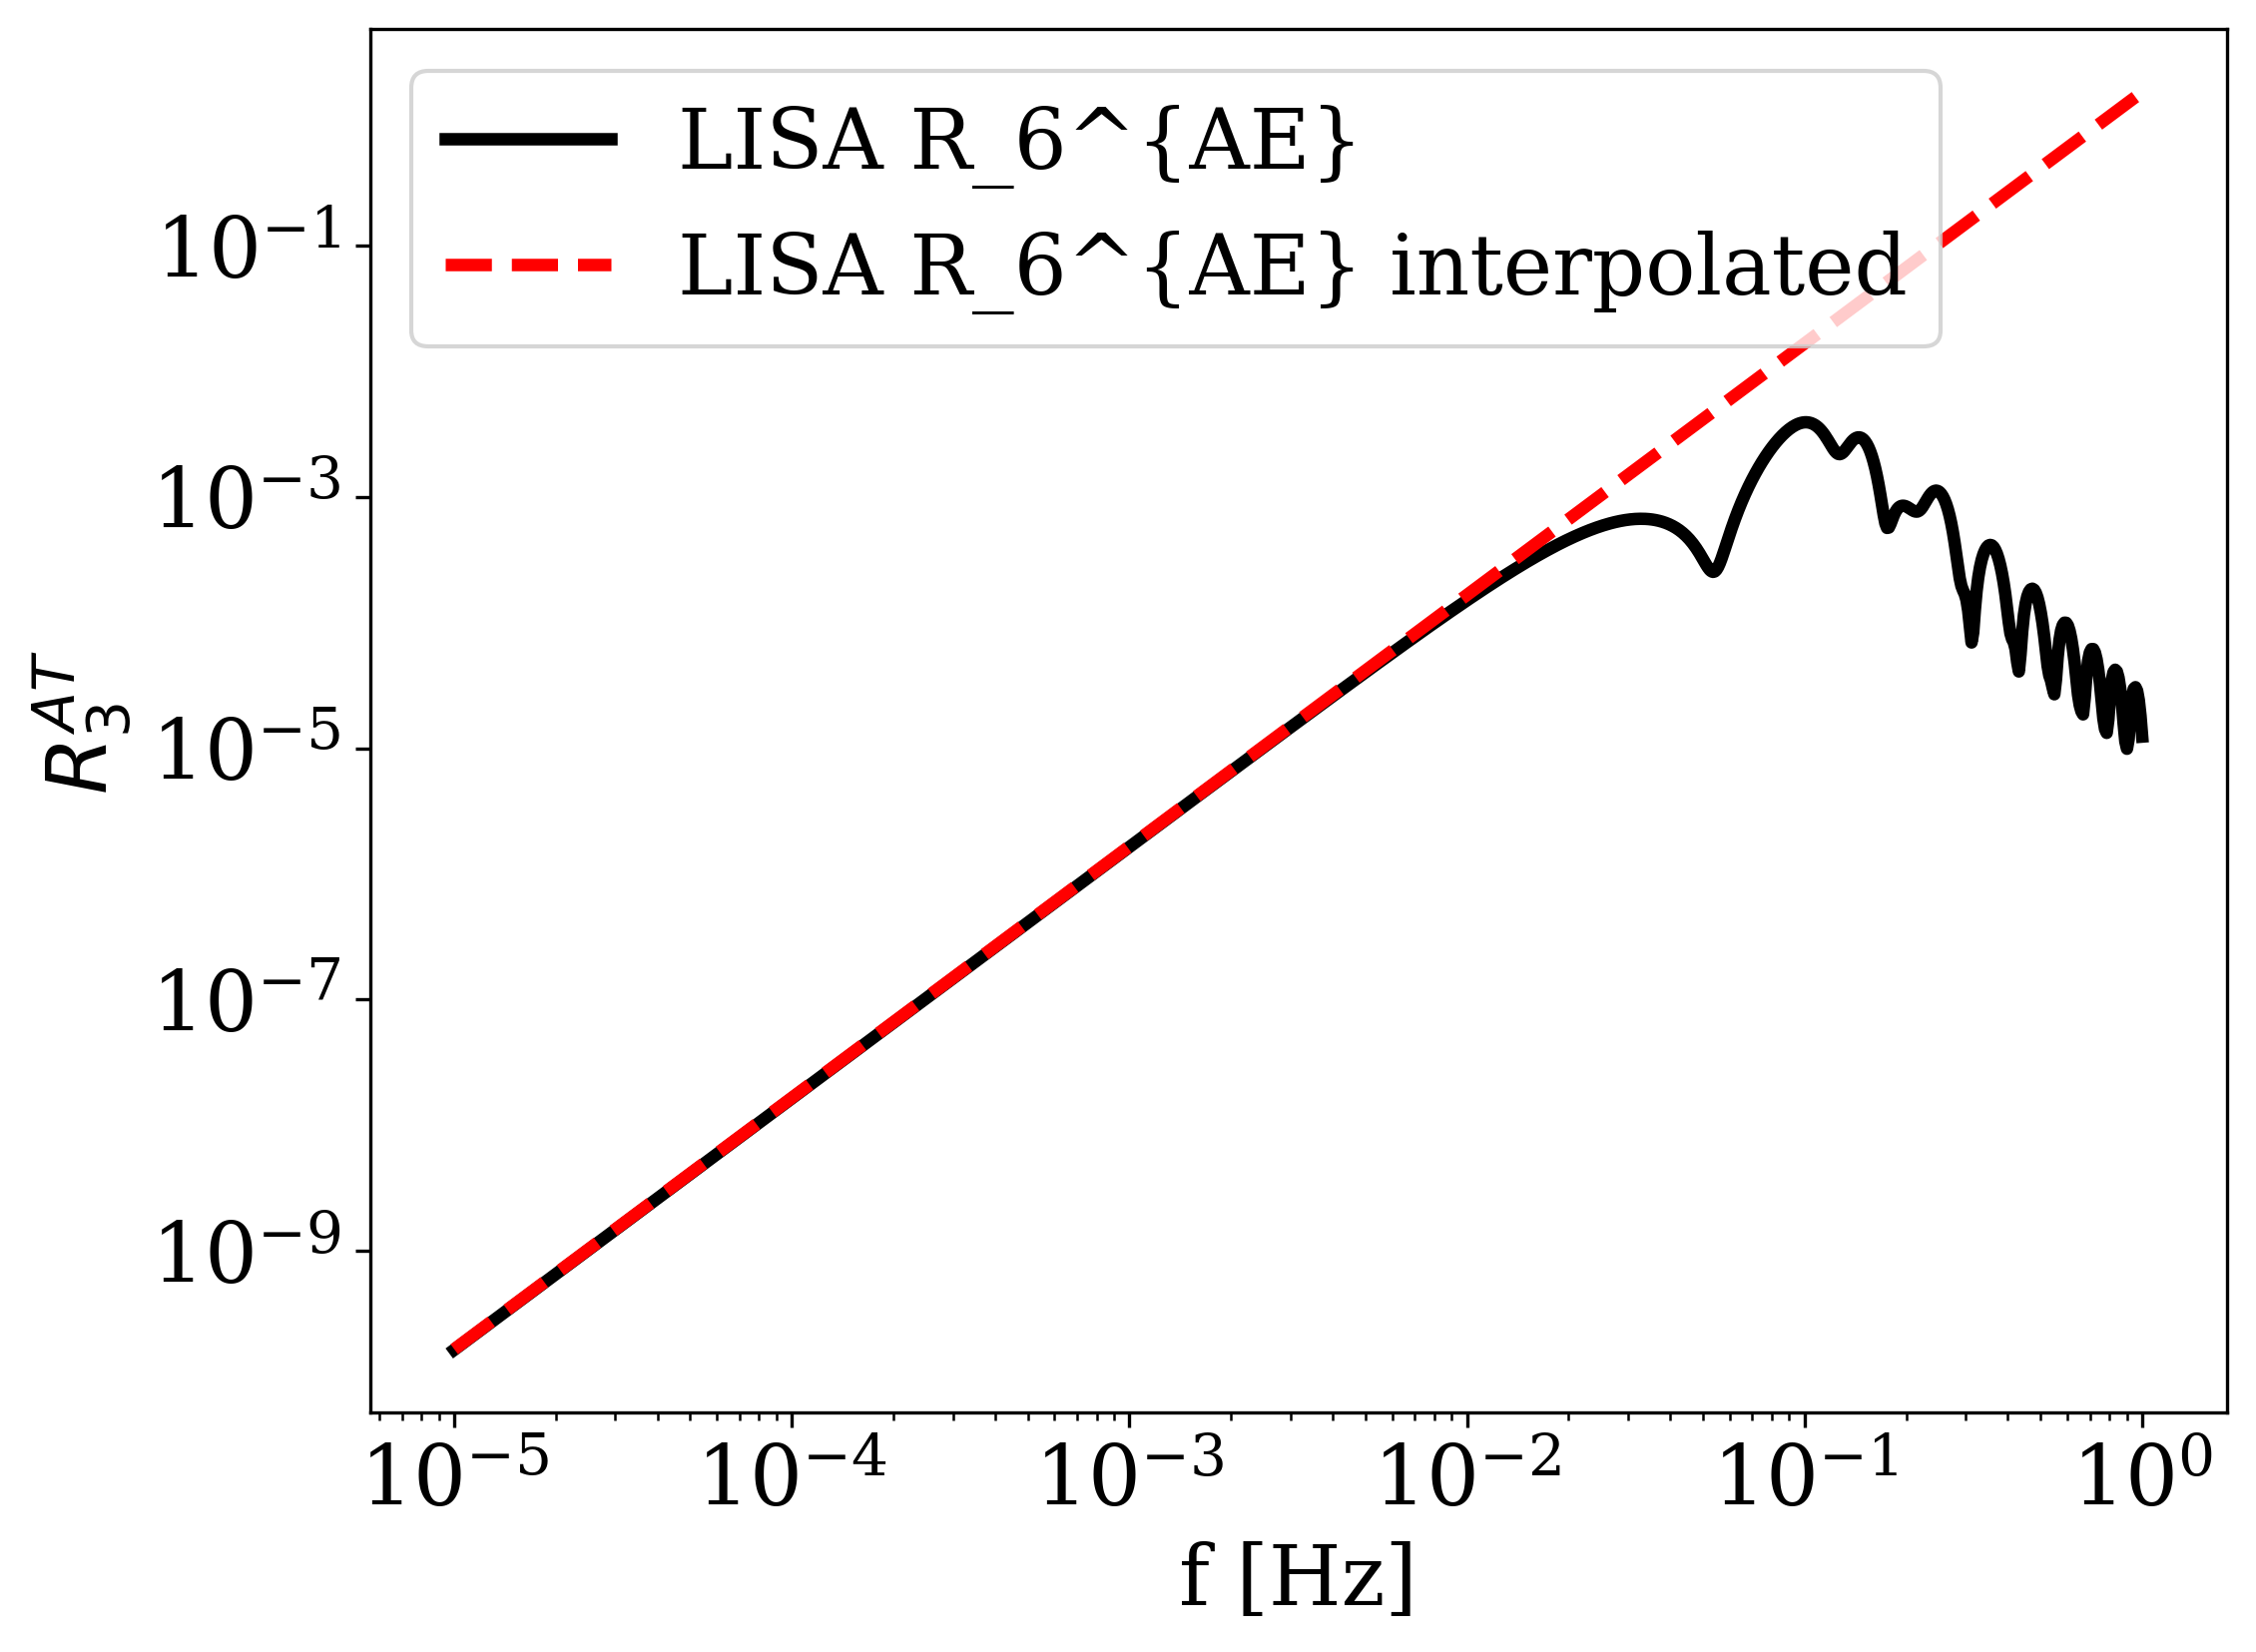

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.loglog(f, LISA_Rell_6_AE, label='LISA R_6^{AE}', color='black')
plt.loglog(f, LISA_Rell_6_AE_interpolated, label='LISA R_6^{AE} interpolated', color='red', linestyle='--')
plt.xlabel('f [Hz]')
plt.ylabel(r'$R_3^{AT}$')
plt.legend()

In [35]:
LISA_Rell_6_TT = nell.AngularResponse.R_ell_AET(6, 'TT', 't', f)
LISA_Rell_6_TT_interpolated = np.sqrt(463/13) * x**6 /88704

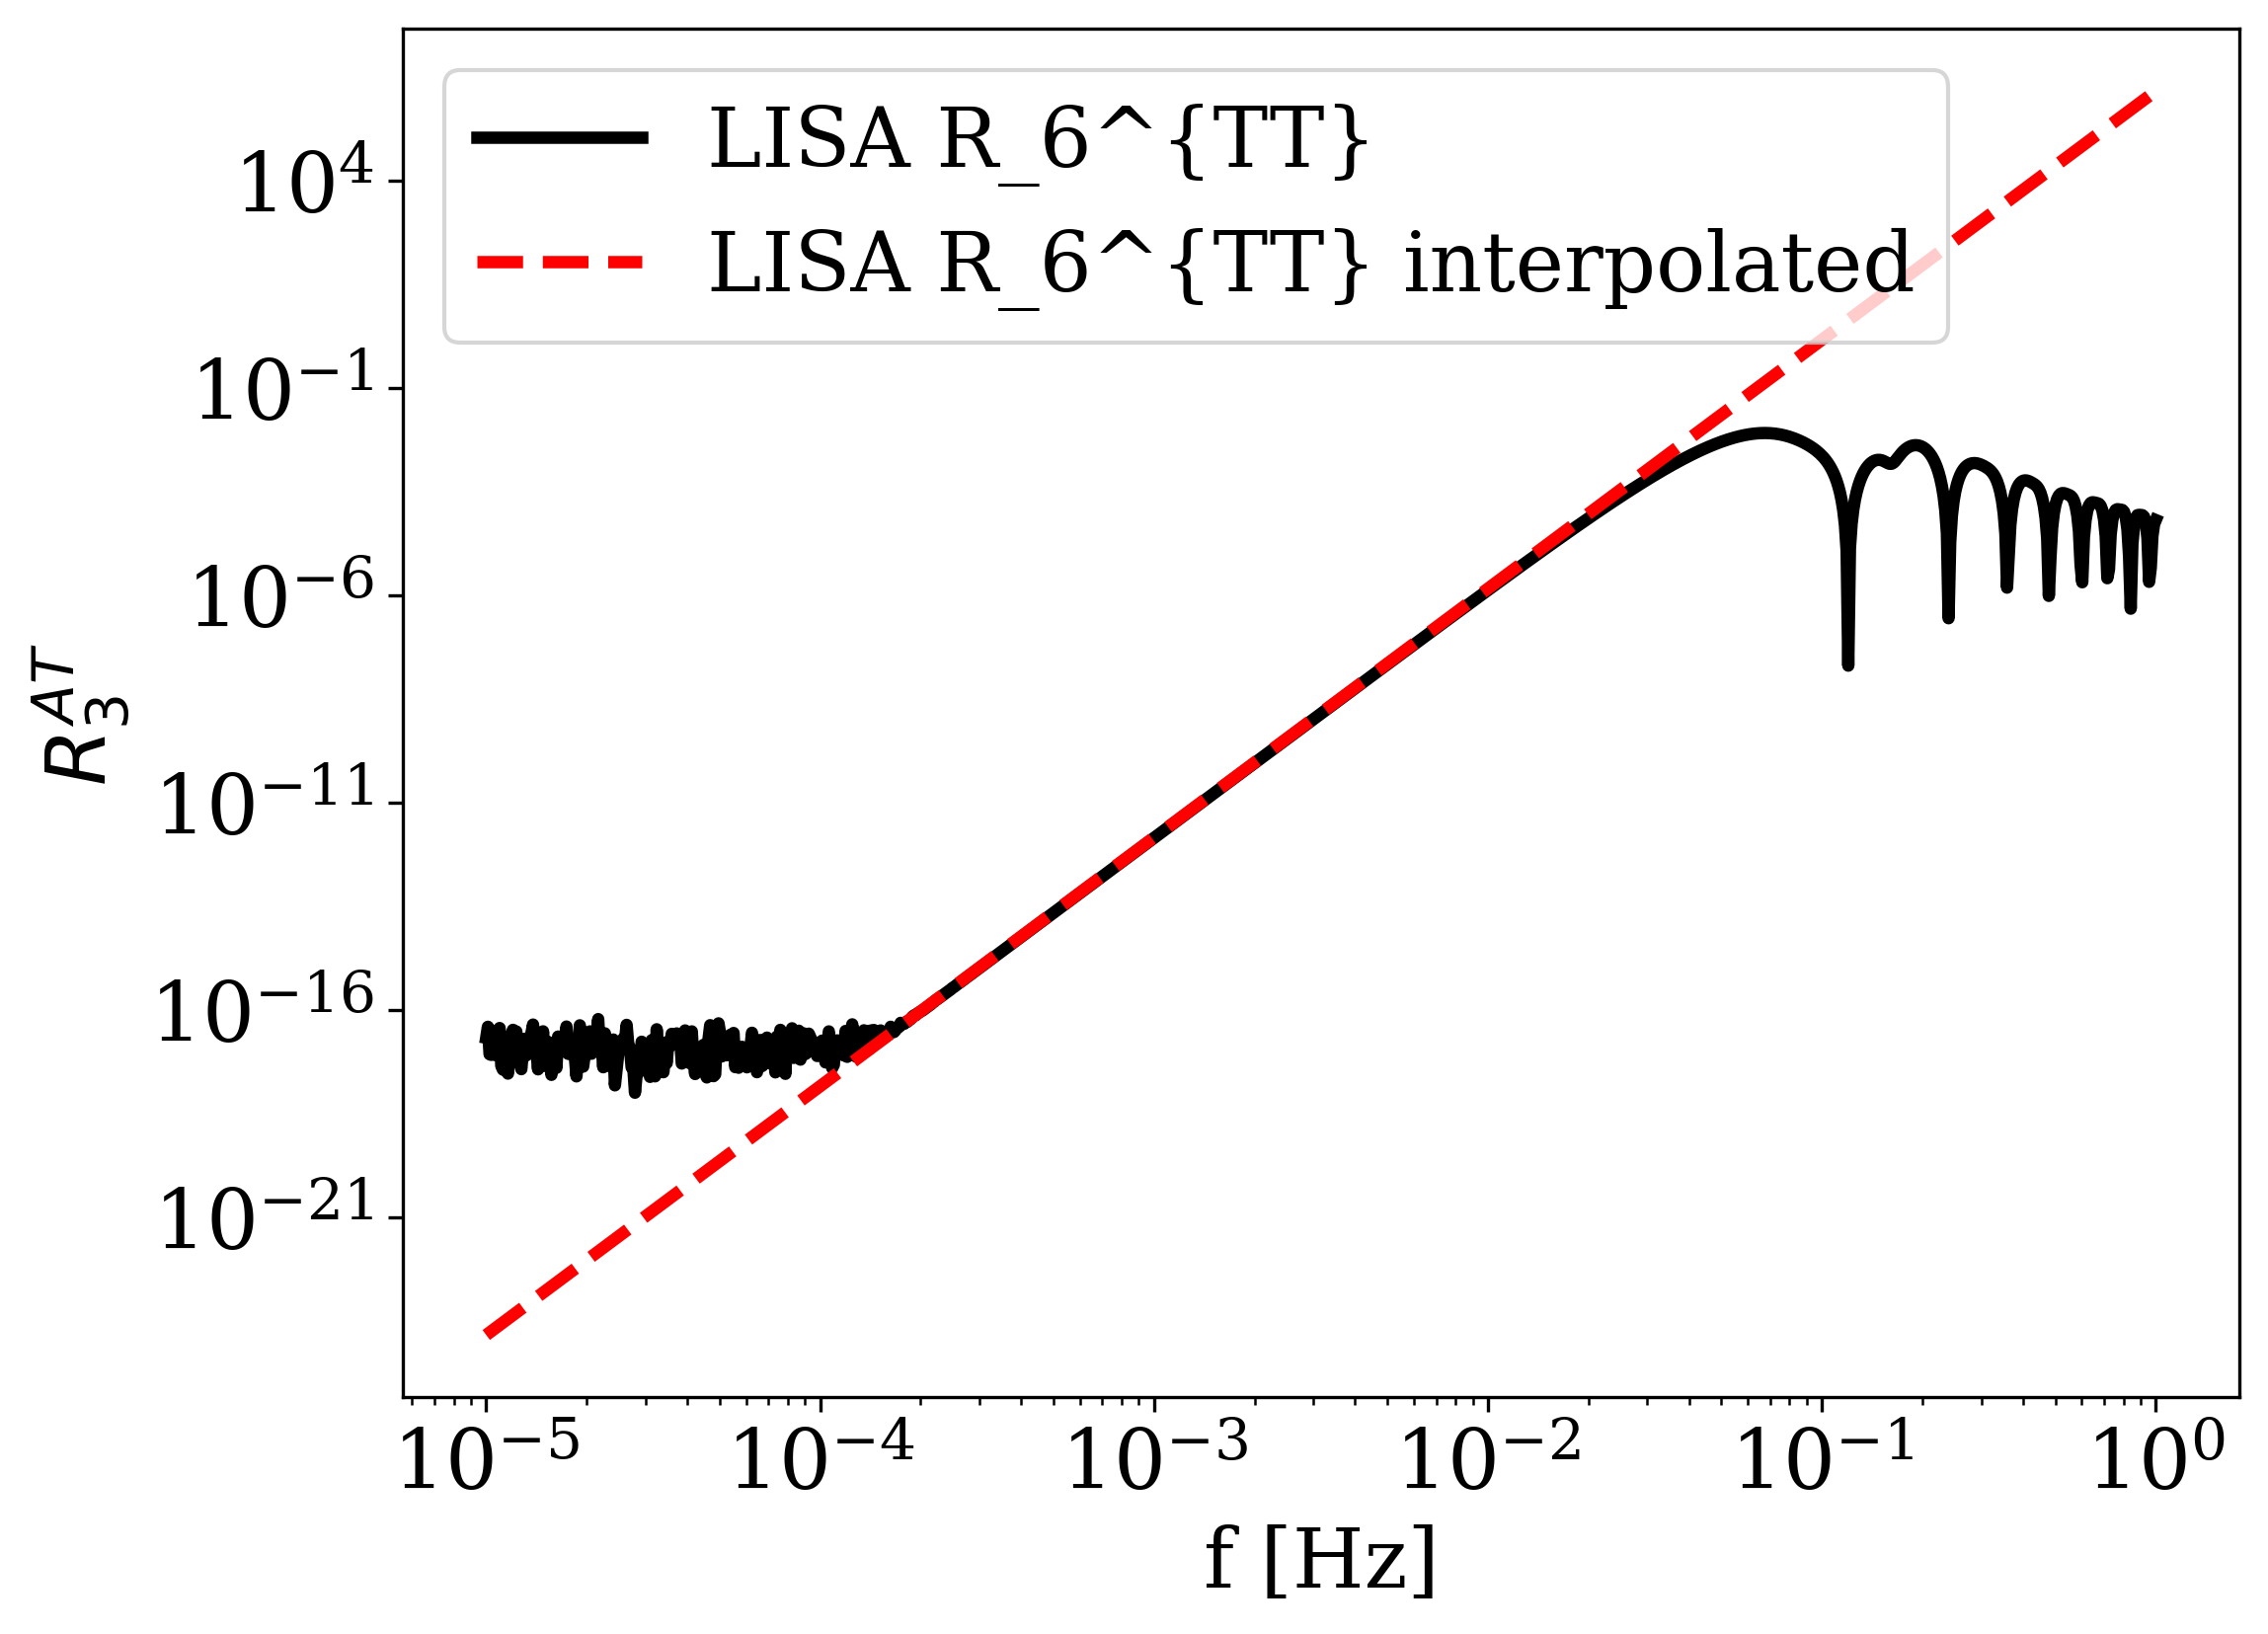

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.loglog(f, LISA_Rell_6_TT, label='LISA R_6^{TT}', color='black')
plt.loglog(f, LISA_Rell_6_TT_interpolated, label='LISA R_6^{TT} interpolated', color='red', linestyle='--')
plt.xlabel('f [Hz]')
plt.ylabel(r'$R_3^{AT}$')
plt.legend()

In [37]:
LISA_Rell_6_AT = nell.AngularResponse.R_ell_AET(6, 'AT', 't', f)
LISA_Rell_6_AT_interpolated = np.sqrt(17/2730) * x**4 / 2112

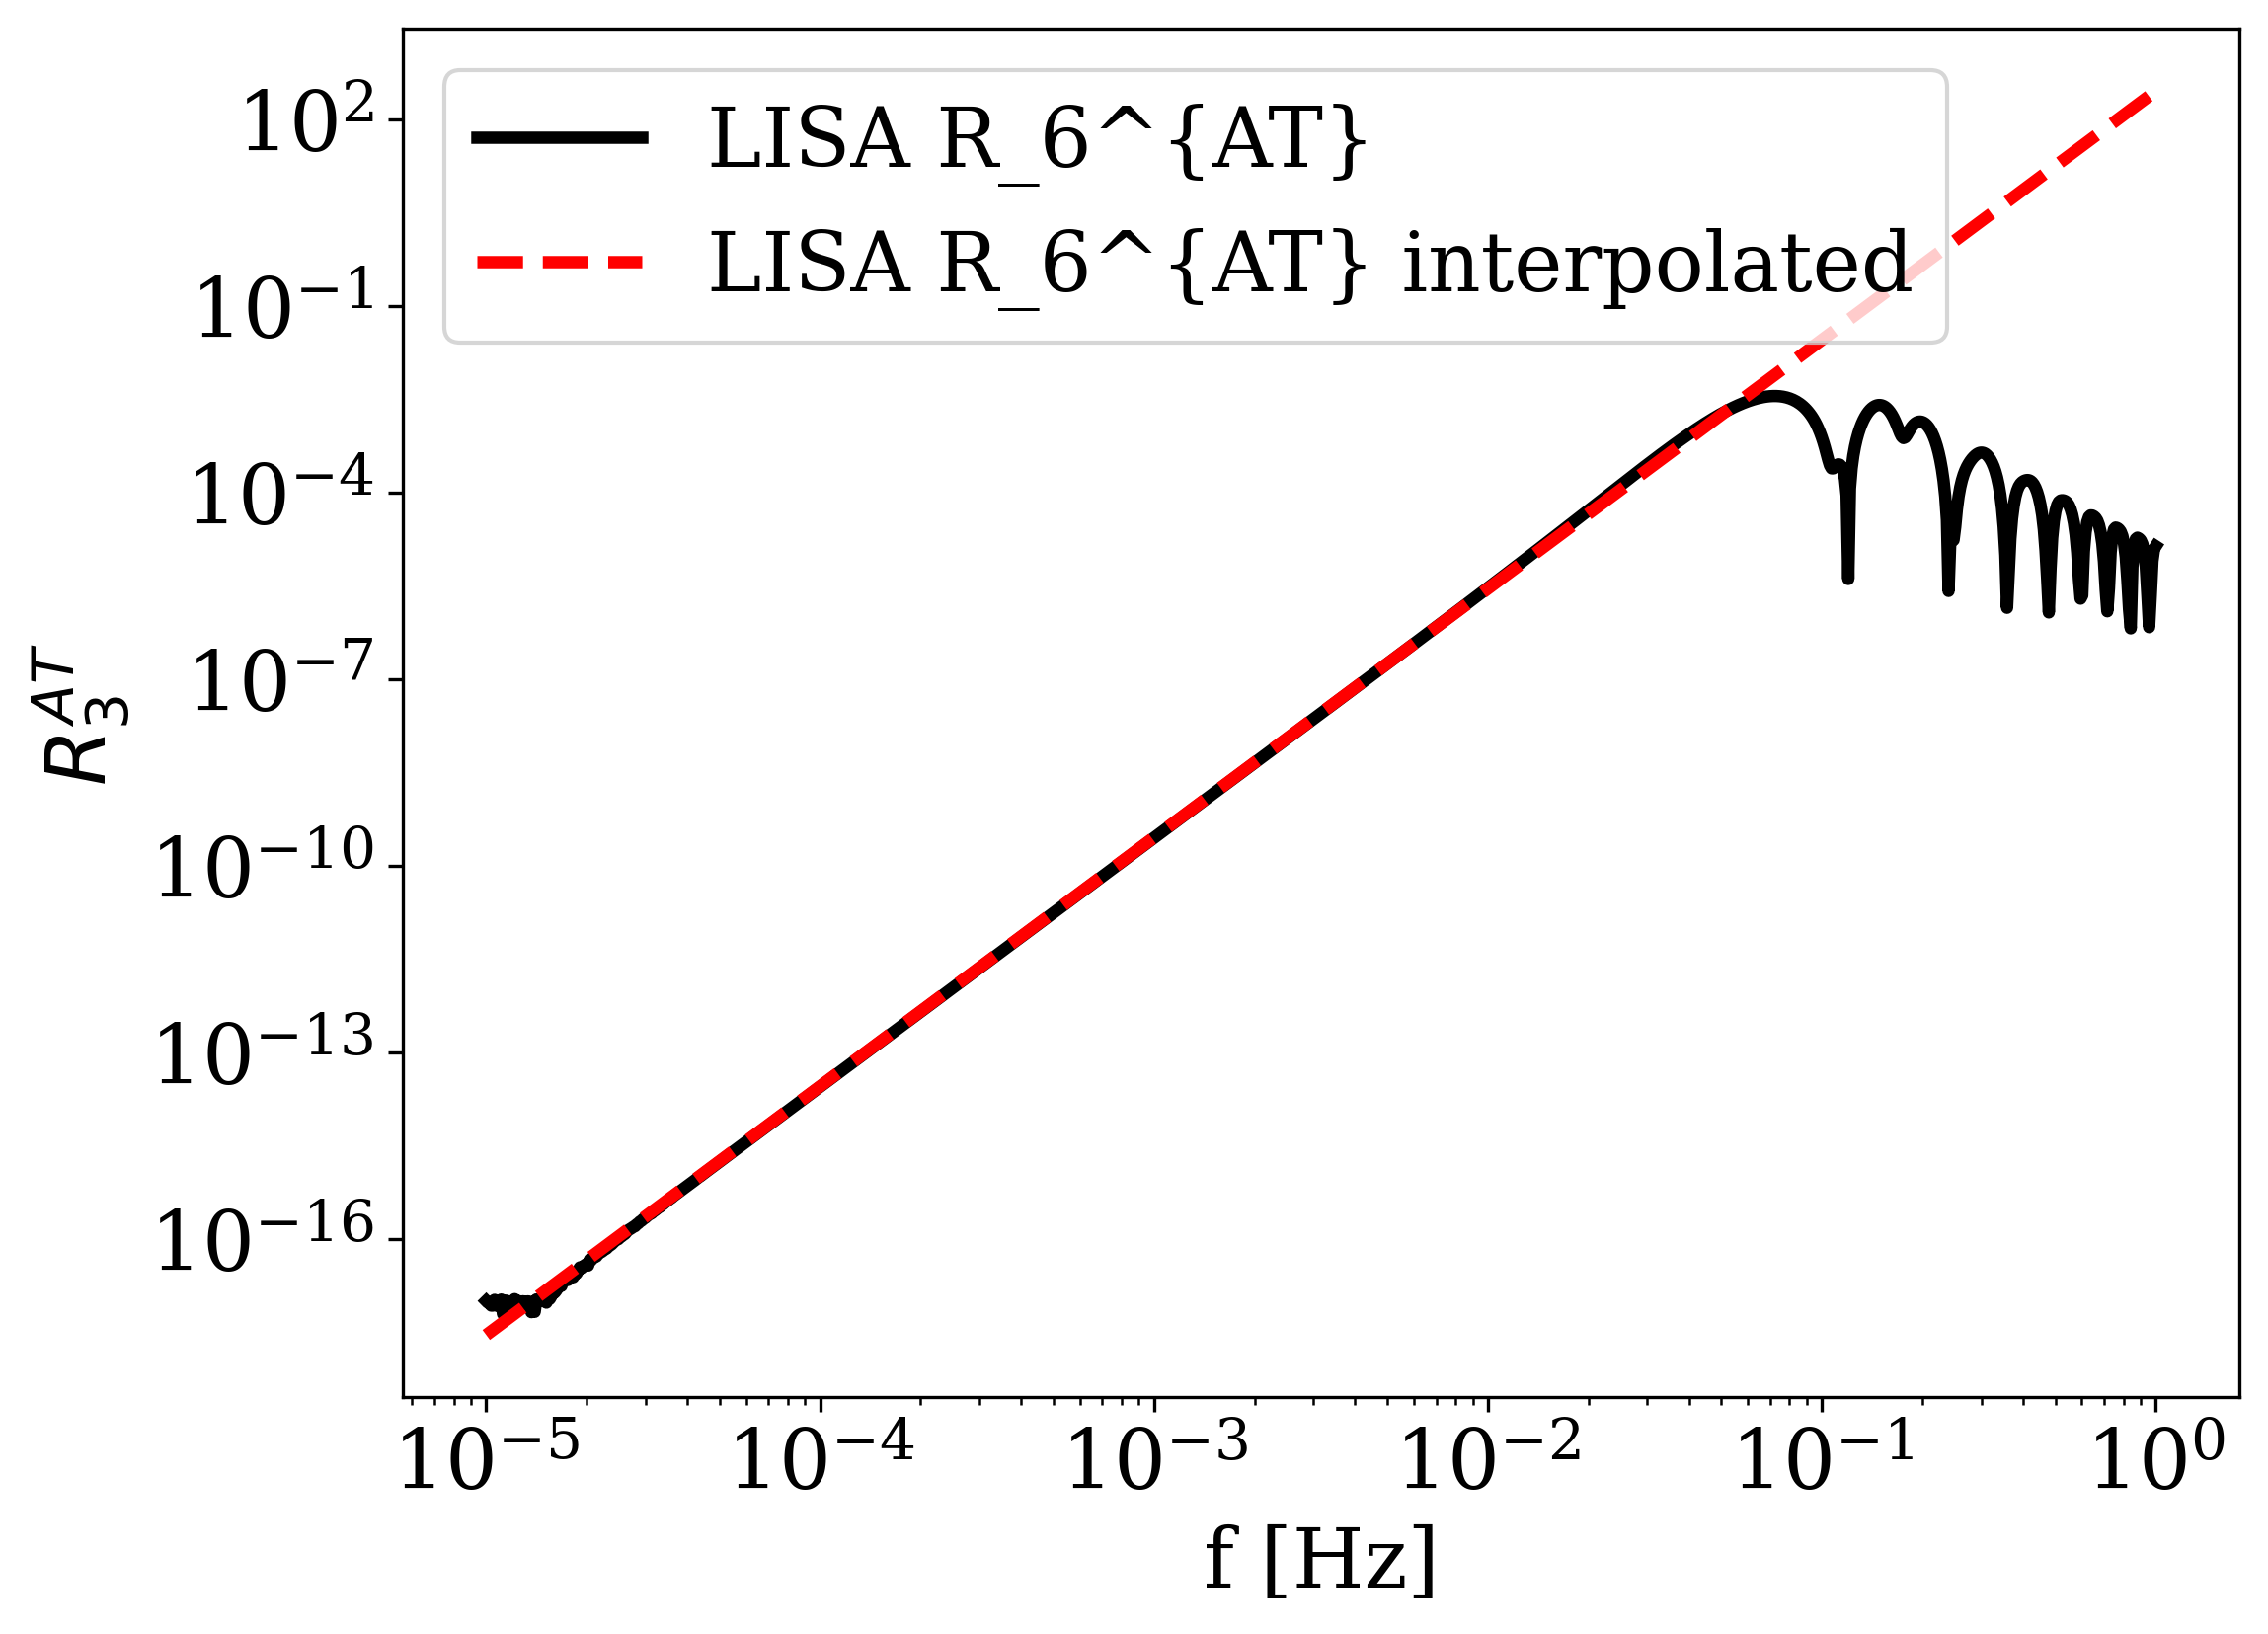

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.loglog(f, LISA_Rell_6_AT, label='LISA R_6^{AT}', color='black')
plt.loglog(f, LISA_Rell_6_AT_interpolated, label='LISA R_6^{AT} interpolated', color='red', linestyle='--')
plt.xlabel('f [Hz]')
plt.ylabel(r'$R_3^{AT}$')
plt.legend()